In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
import os
os.chdir(r'E:\statistics')


In [3]:
#importing the dataset
df=pd.read_csv('data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

In [6]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [7]:
## Now we can check duplicates
df[df.duplicated()].count()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Observation:

The dataset has 6819 records and 96 columns. Columns includes financial attributes and their bankruptcy status in Bankrupt?.
Datatypes are float64 or int64 in similar range from 0 to 1.
There is no null or duplicated values.

In [8]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

handling outliers.

In [10]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype == 'float64':  # Ensure the column is float
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("================================================================================")

# Detect outliers in float columns
outliers = detect_outliers_iqr(df)

# Print the number of outliers for each float feature
count = 0
for feature, outlier_data in outliers.items():
    print(f'{feature}: {len(outlier_data)} outliers')
    if len(outlier_data) > 0:
        count += 1

# Function to cap outliers for float columns using IQR
def cap_outliers(df):
    for column in df.columns:
        if df[column].dtype == 'float64':  # Ensure the column is float
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Handle outliers in float columns
data_cleaned = cap_outliers(df)

# Verify the changes

print("Outliers have been capped.")
data_cleaned.describe()
print("=============================================================================")
print("Outliers Found In:", count, "columns")

 ROA(C) before interest and depreciation before interest: 391 outliers
 ROA(A) before interest and % after tax: 561 outliers
 ROA(B) before interest and depreciation after tax: 432 outliers
 Operating Gross Margin: 320 outliers
 Realized Sales Gross Margin: 318 outliers
 Operating Profit Rate: 716 outliers
 Pre-tax net Interest Rate: 773 outliers
 After-tax net Interest Rate: 867 outliers
 Non-industry income and expenditure/revenue: 1094 outliers
 Continuous interest rate (after tax): 806 outliers
 Operating Expense Rate: 0 outliers
 Research and development expense rate: 182 outliers
 Cash flow rate: 576 outliers
 Interest-bearing debt interest rate: 396 outliers
 Tax rate (A): 120 outliers
 Net Value Per Share (B): 457 outliers
 Net Value Per Share (A): 464 outliers
 Net Value Per Share (C): 465 outliers
 Persistent EPS in the Last Four Seasons: 508 outliers
 Cash Flow Per Share: 532 outliers
 Revenue Per Share (Yuan ¥): 478 outliers
 Operating Profit Per Share (Yuan ¥): 442 outlier

# Exploratory Data Analysis (EDA):

Generate descriptive statistics.

In [11]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505667          
std       0.176710                                           0.051483          
min       0.000000                                           0.387973          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           0.624116          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.560507   
std                                   0.050087   
min                                   0.455122   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   0.669579   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.554691    
std                                             0.050277    
min                                             0.442034    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             0.669348    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607834                      0.607812   
std                   0.010758                      0.010725   
min                   0.580240                      0.580321   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   0.634118                      0.633954   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.999028                    0.797467   
std                  0.000120                    0.000189   
min                  0.998781                    0.797096   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  0.999282                    0.797868   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809378   
std                        0.000157   
min                        0.809075   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        0.809706   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303526  ...   
std                                        0.000124  ...   
min                                        0.303288  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        0.303764  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                 6819.000000   
mean                      0.810070                    0.003750   
std                       0.027735                    0.003805   
min

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Visualize feature distributions and target variable.

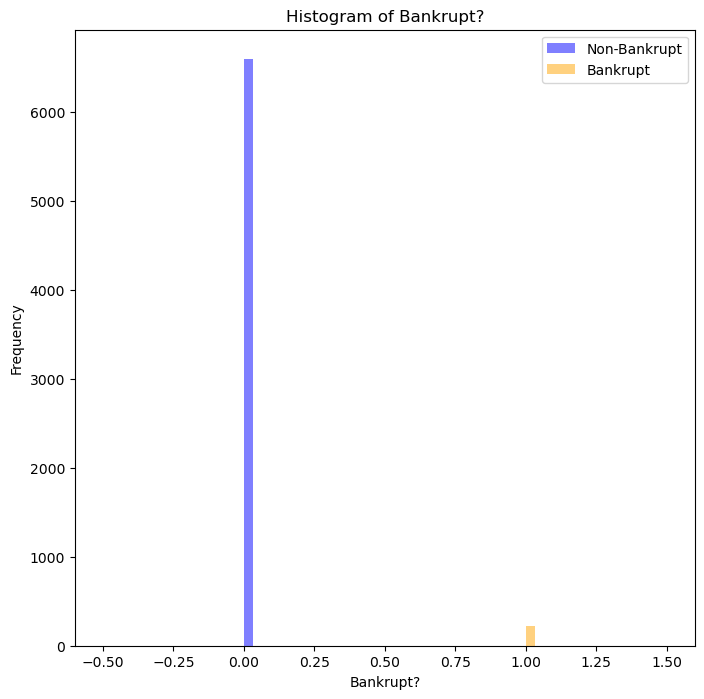

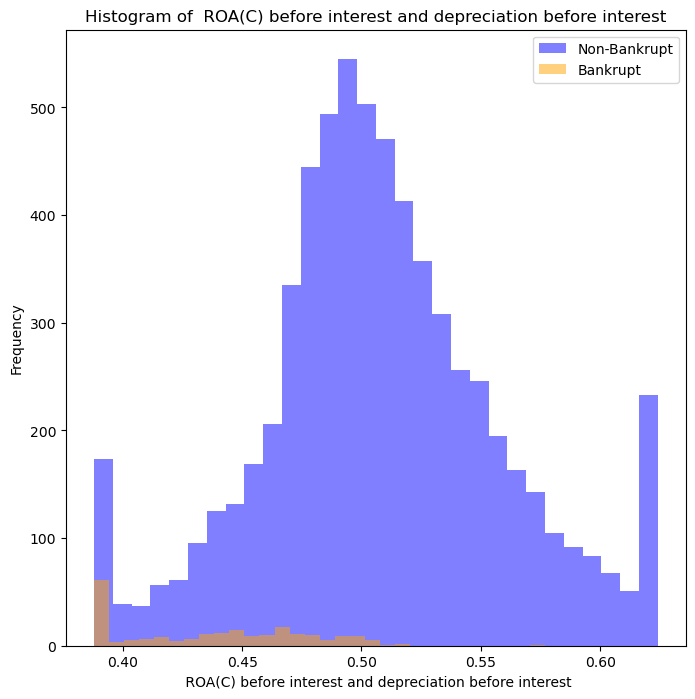

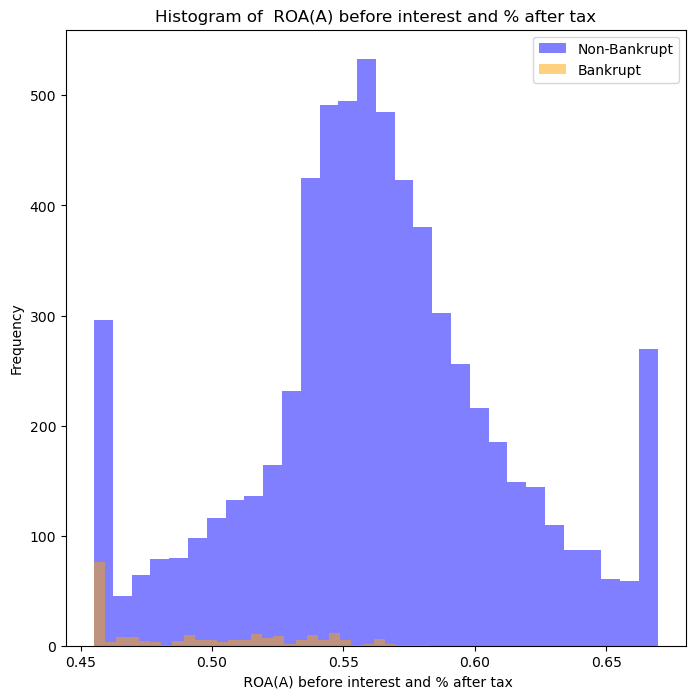

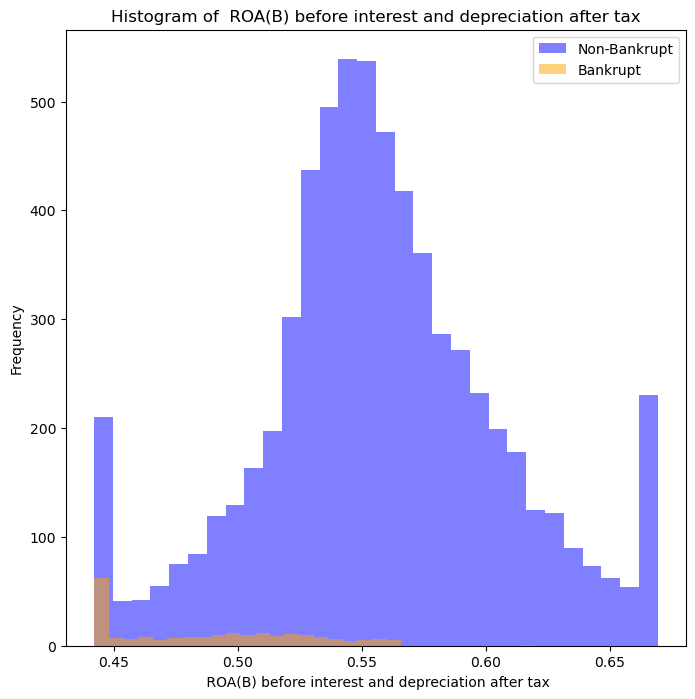

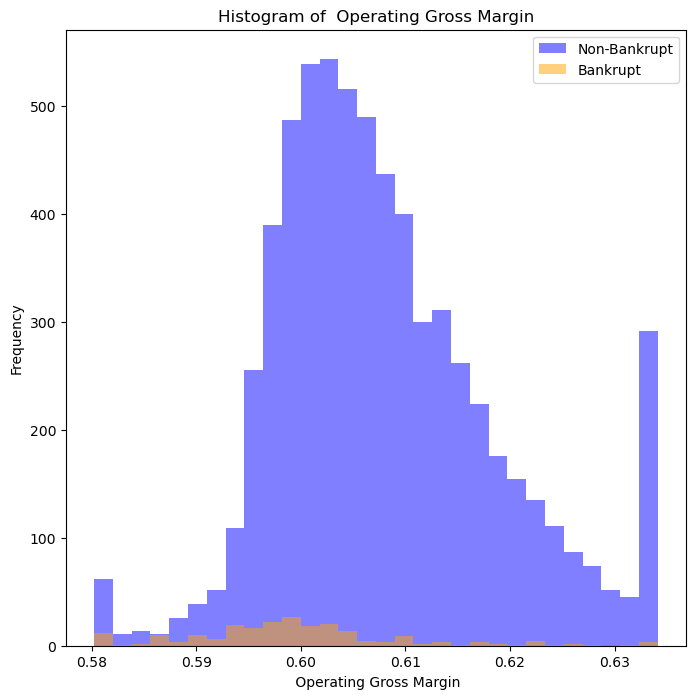

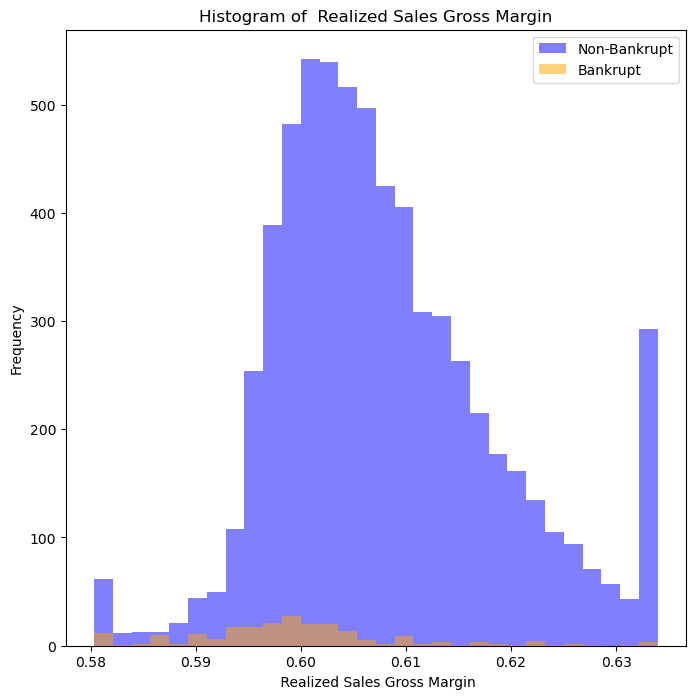

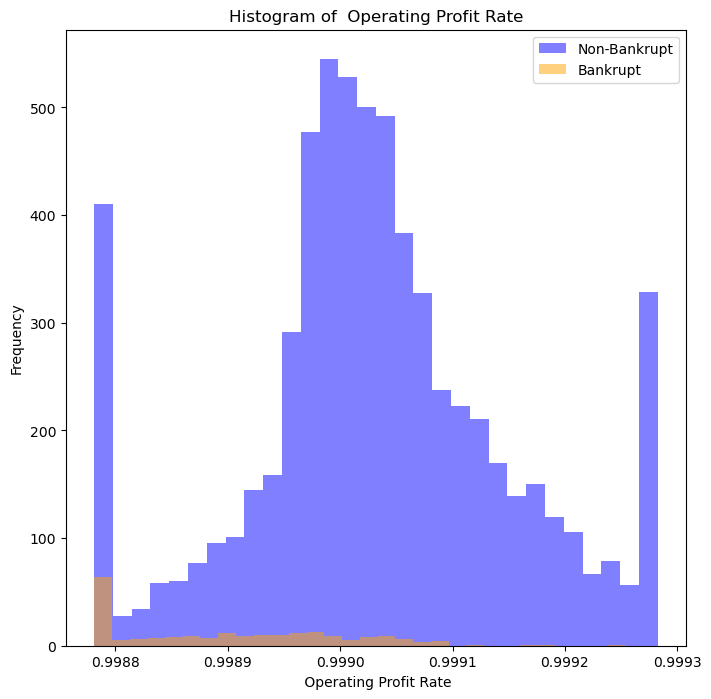

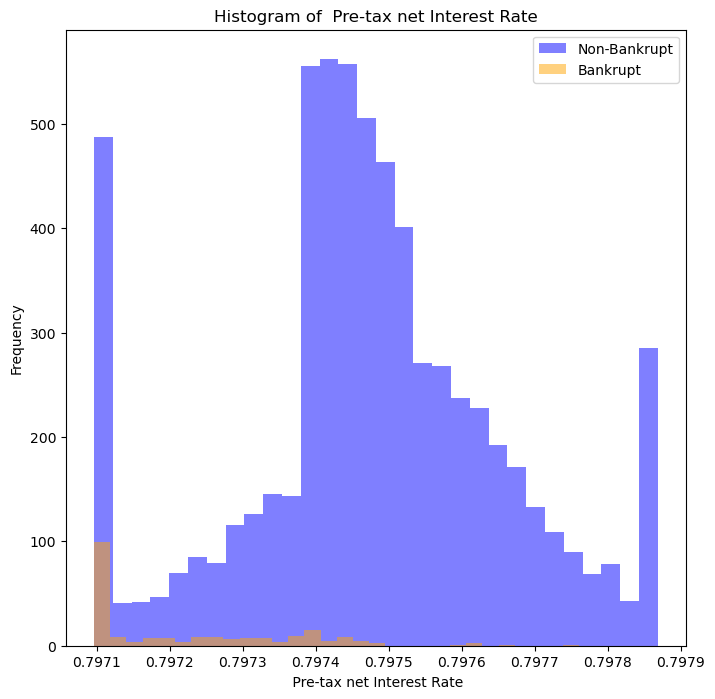

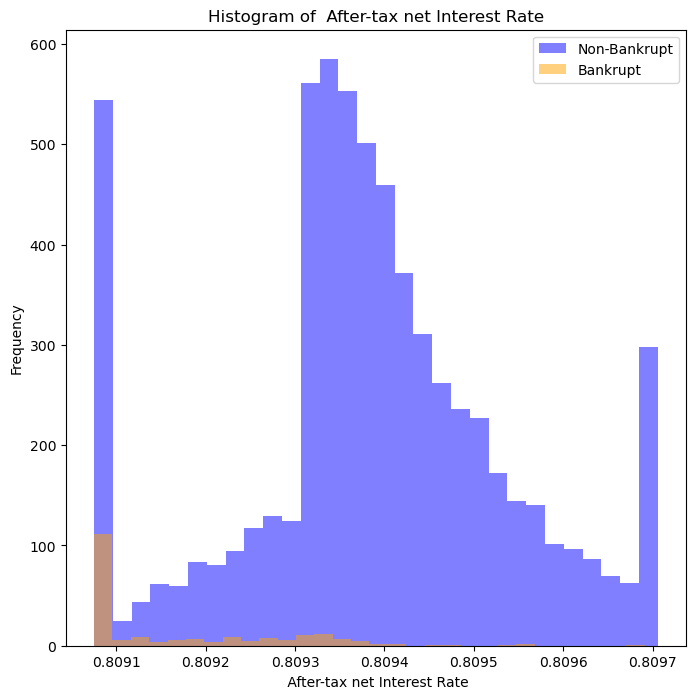

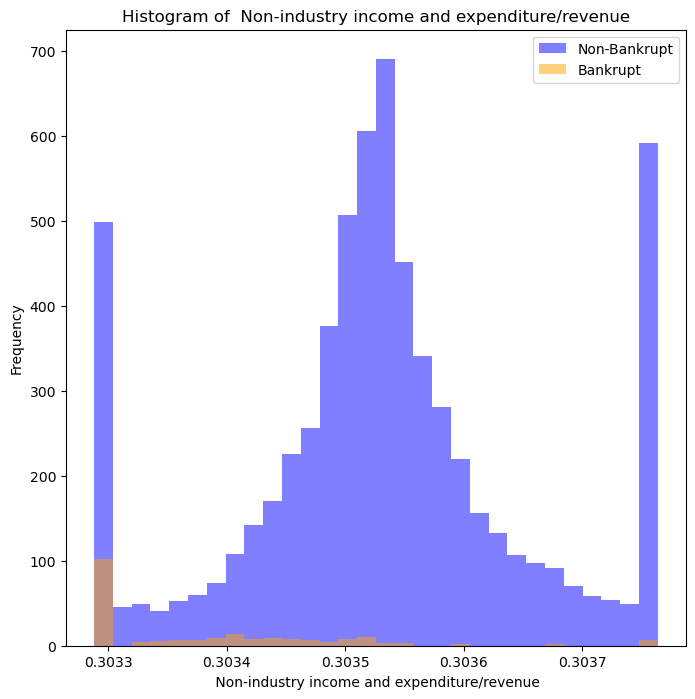

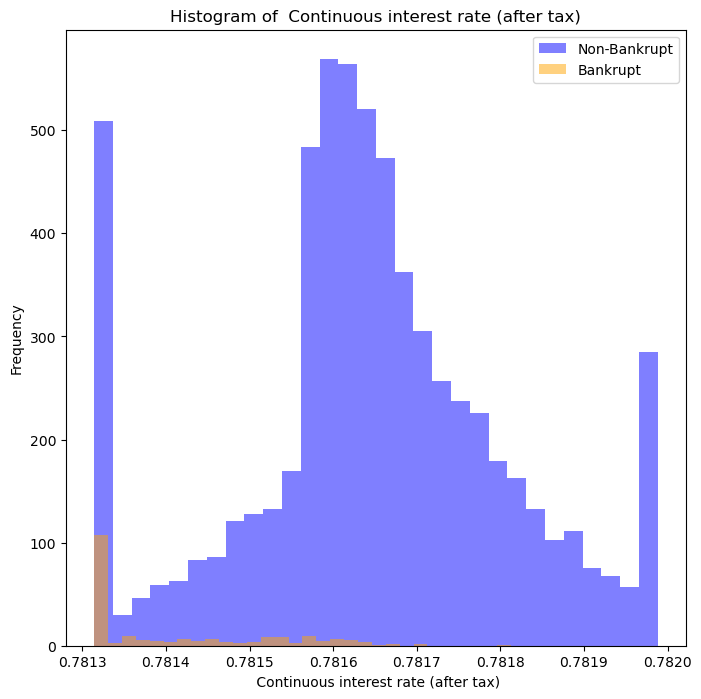

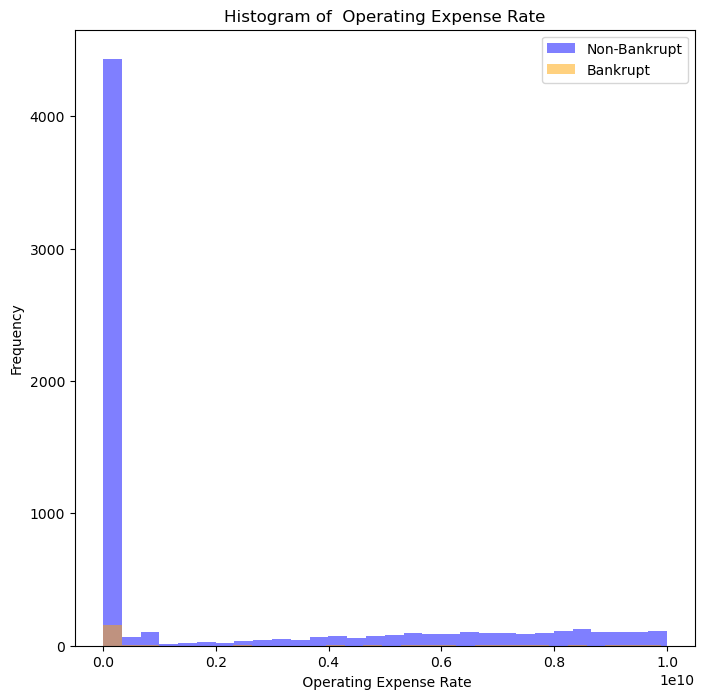

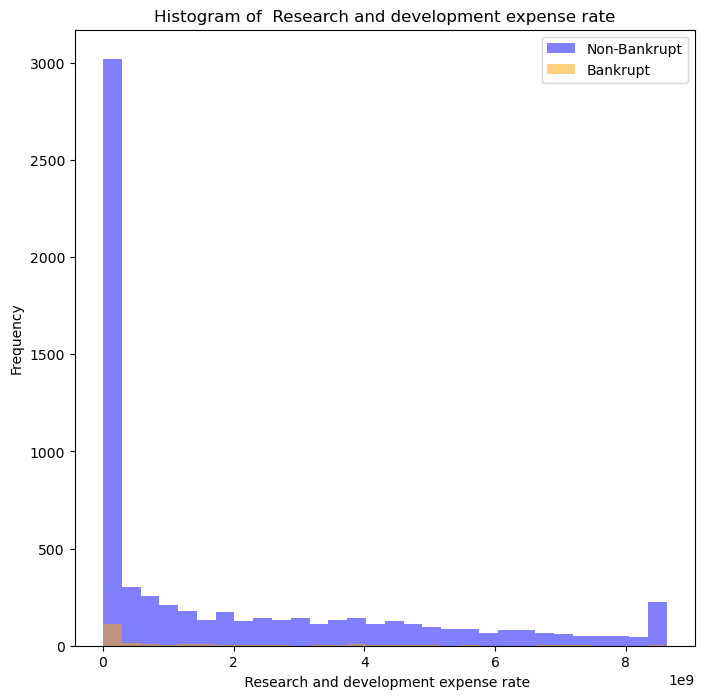

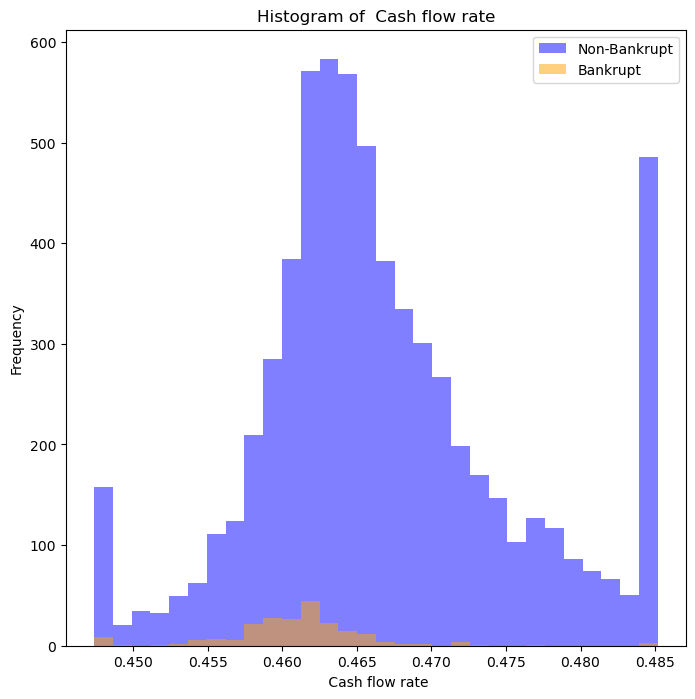

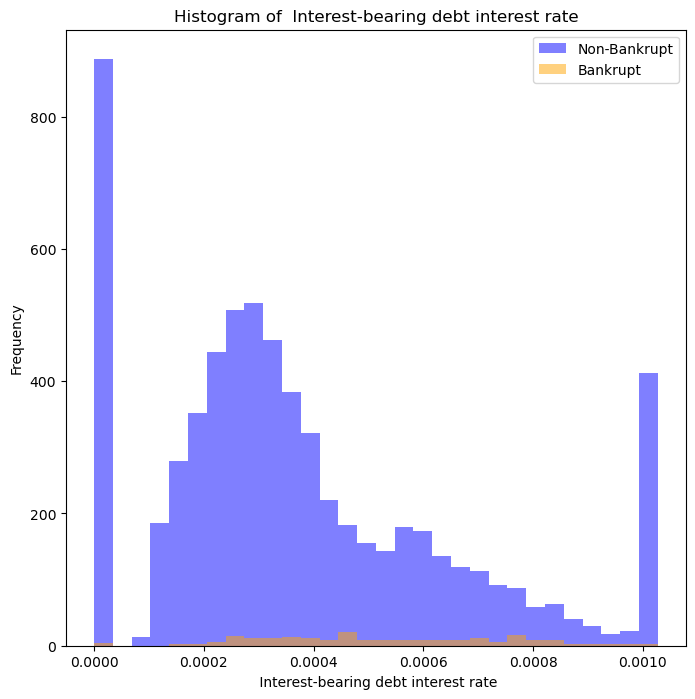

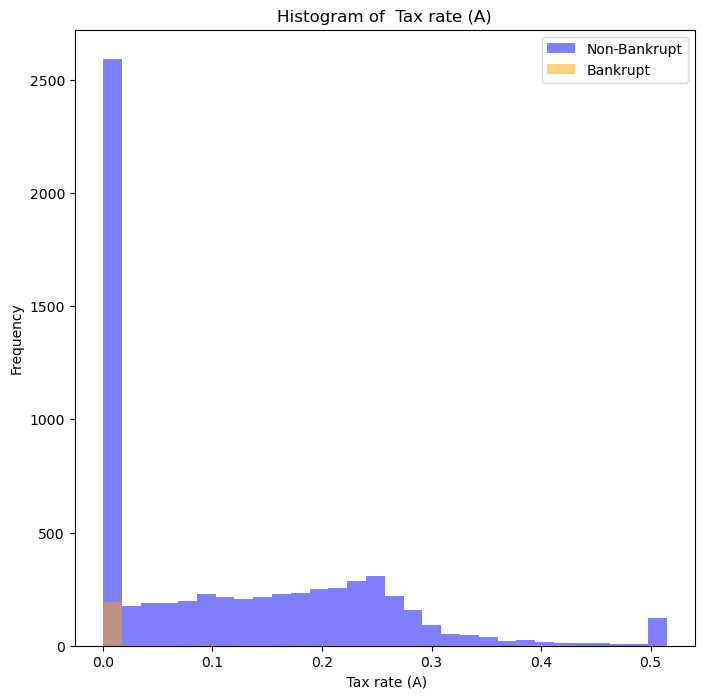

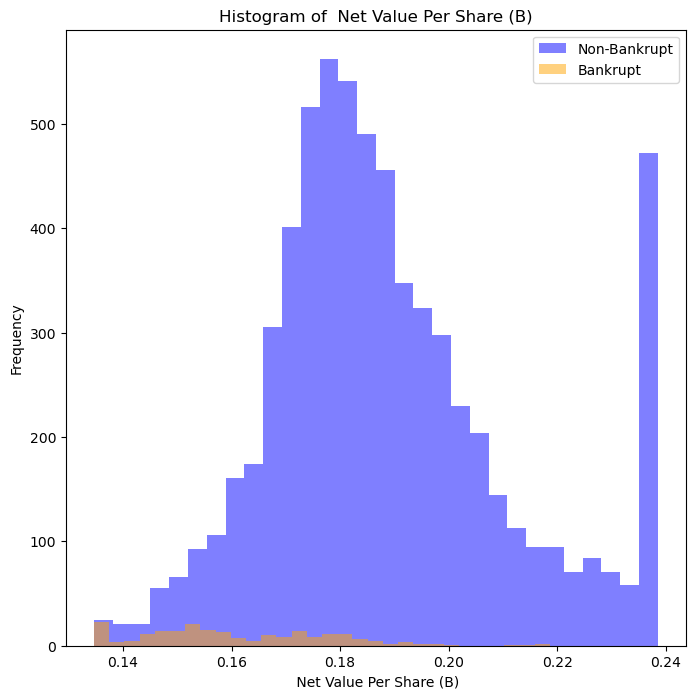

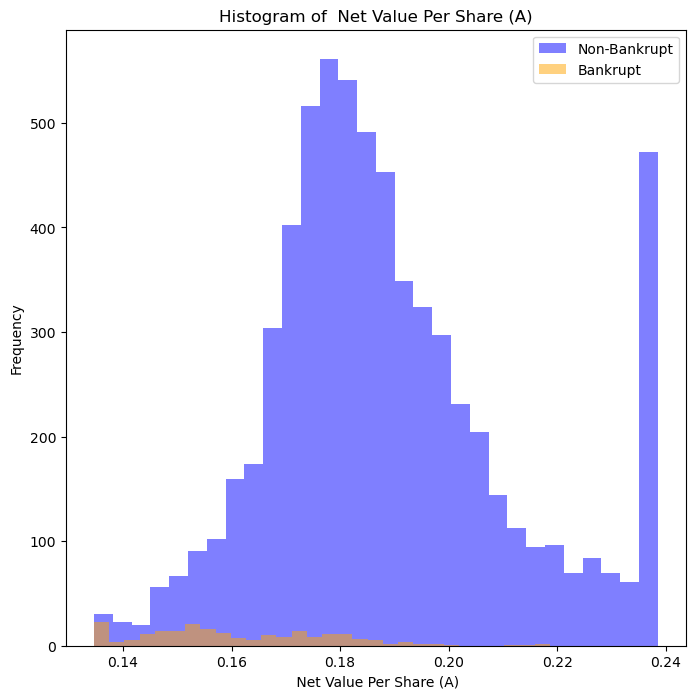

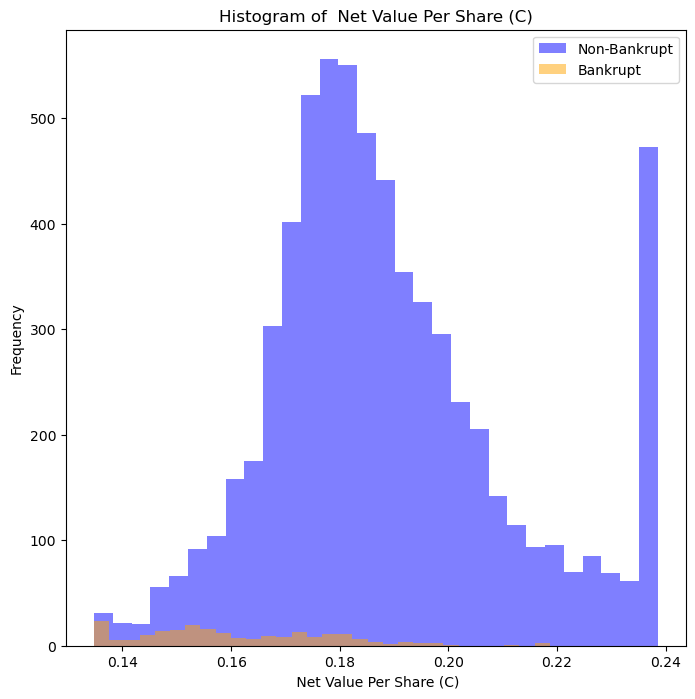

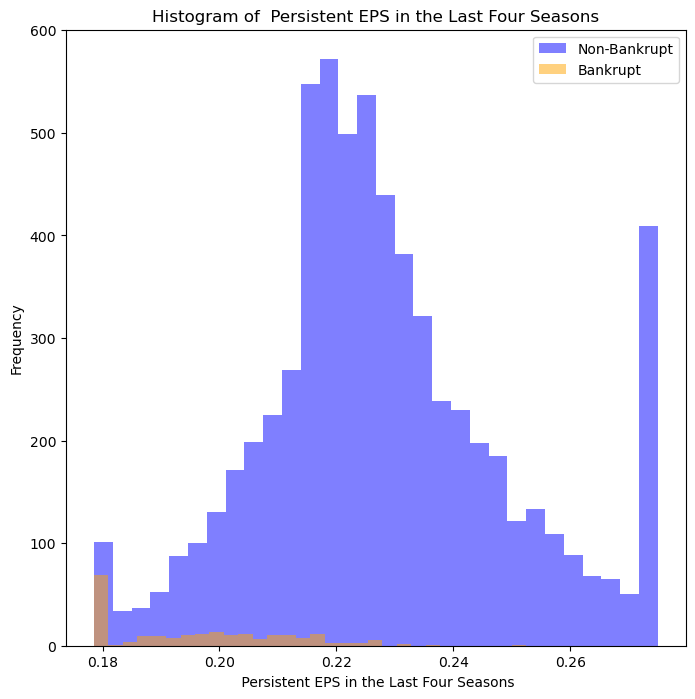

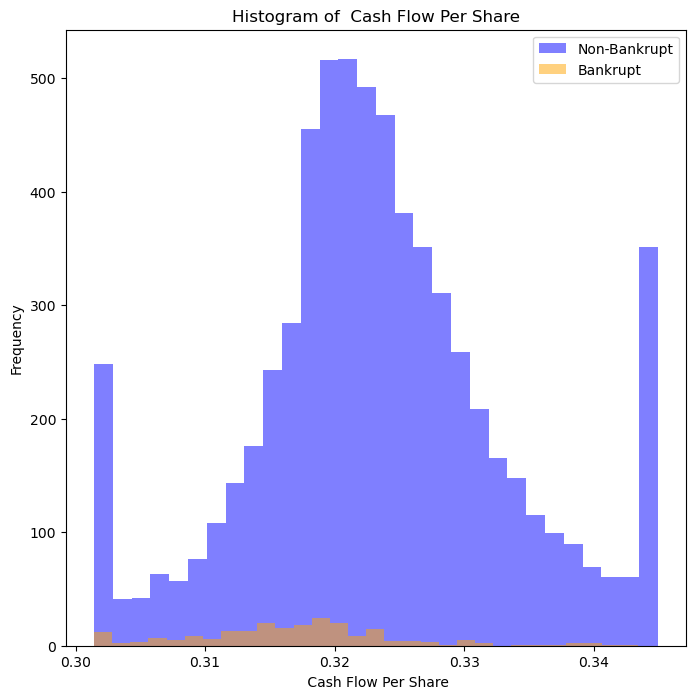

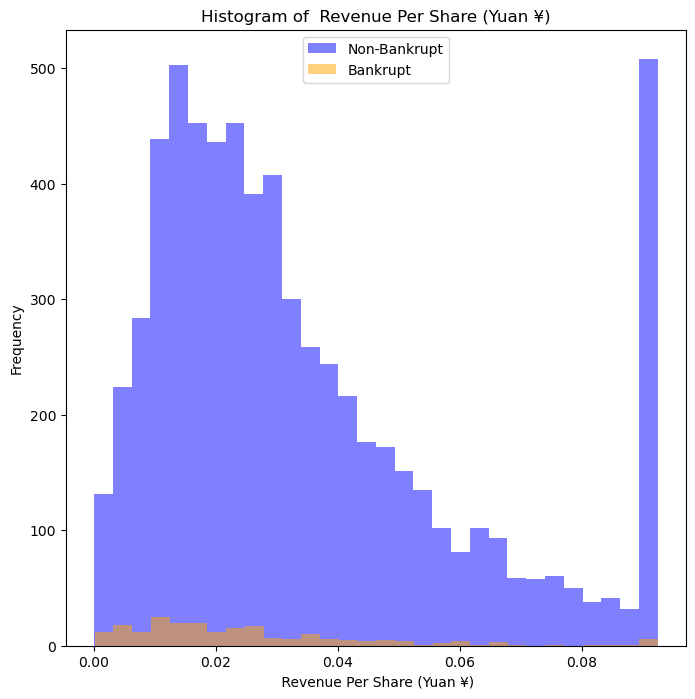

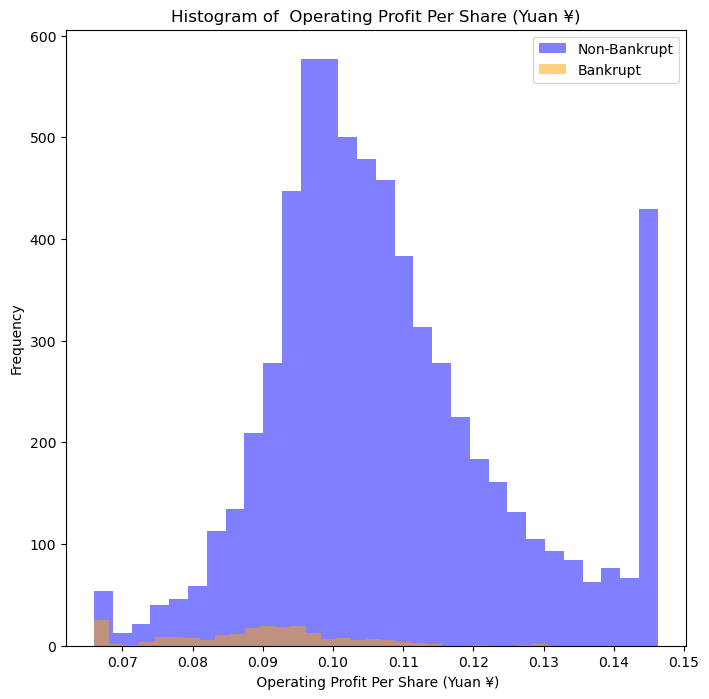

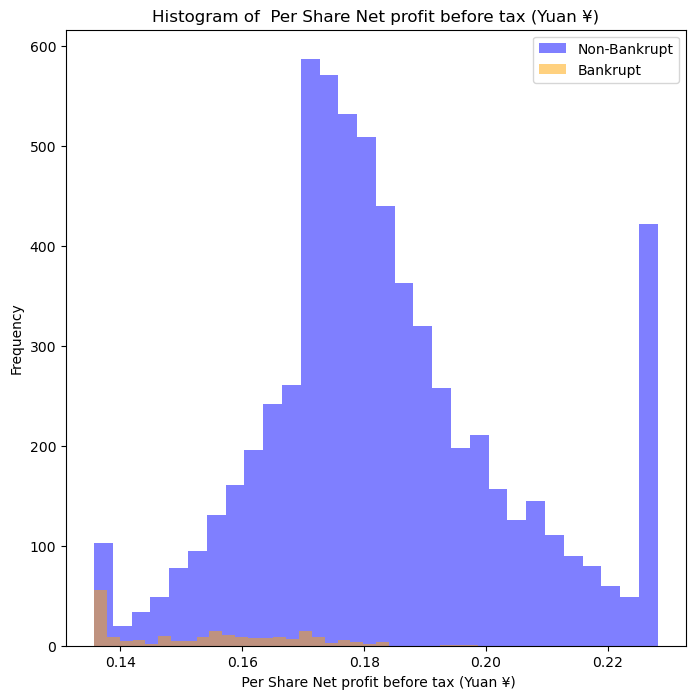

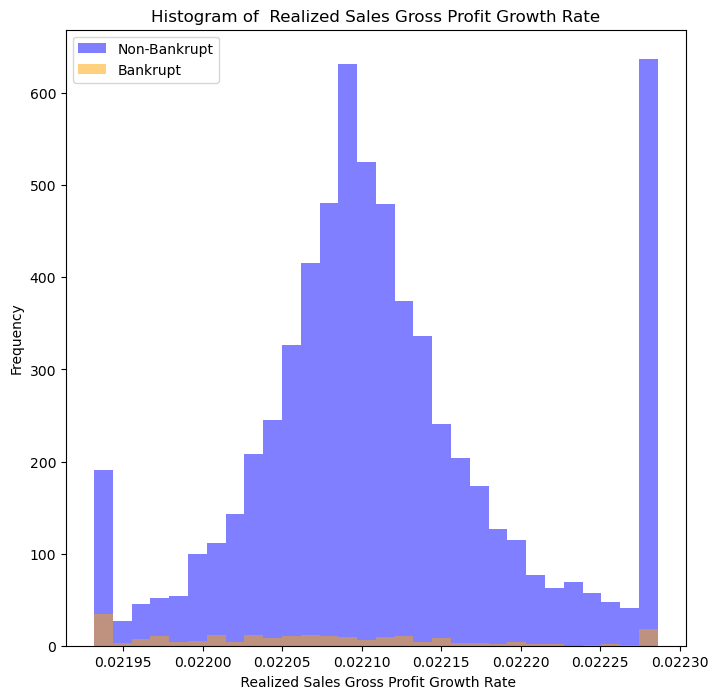

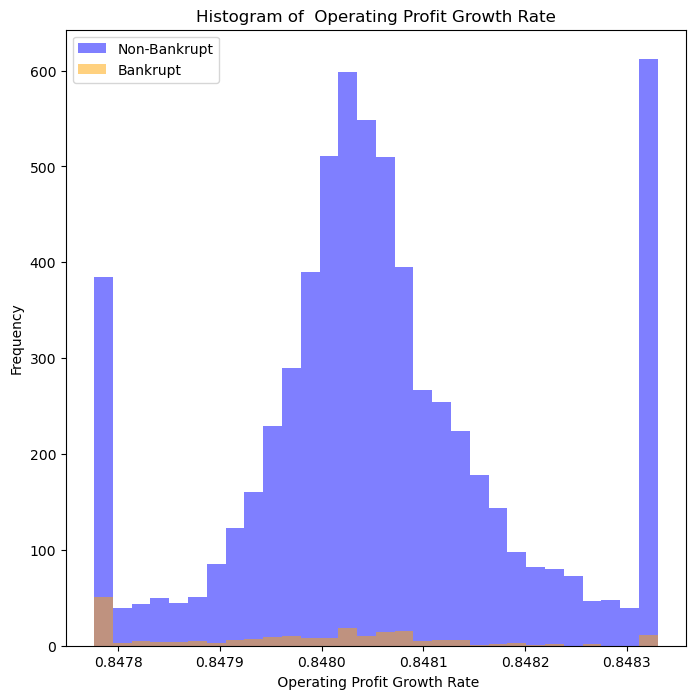

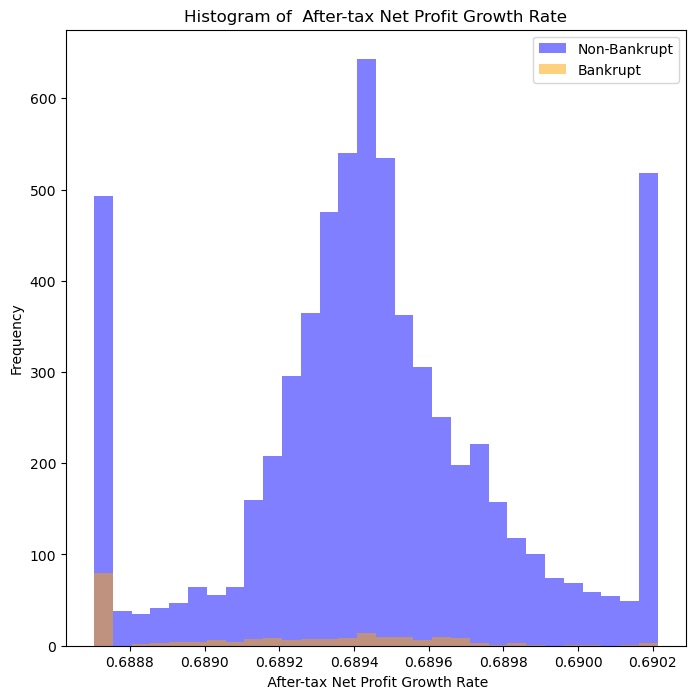

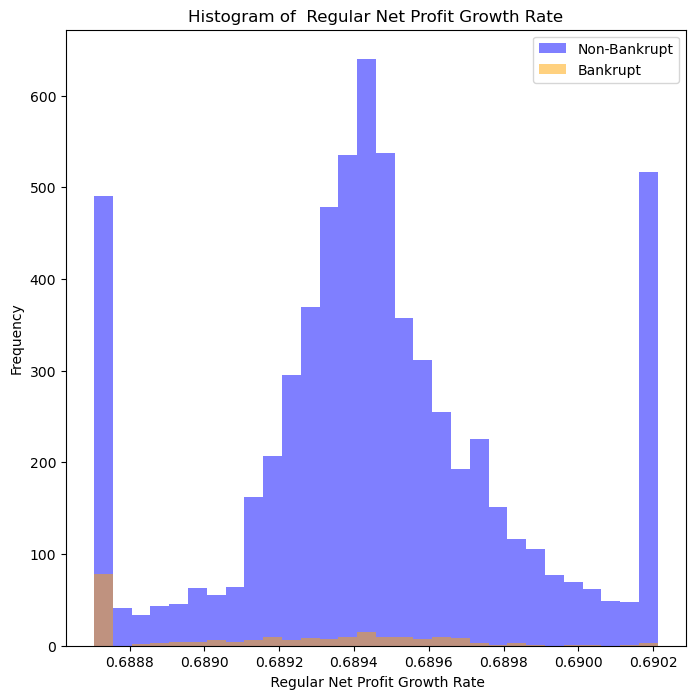

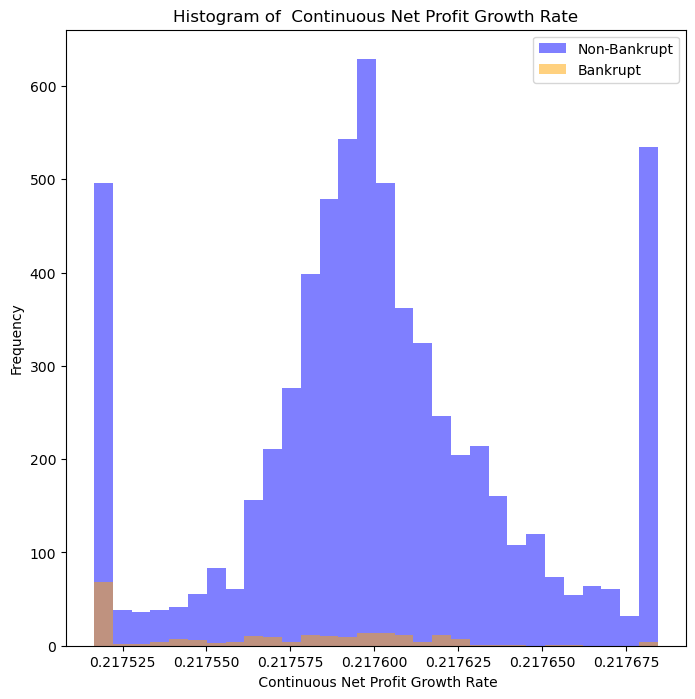

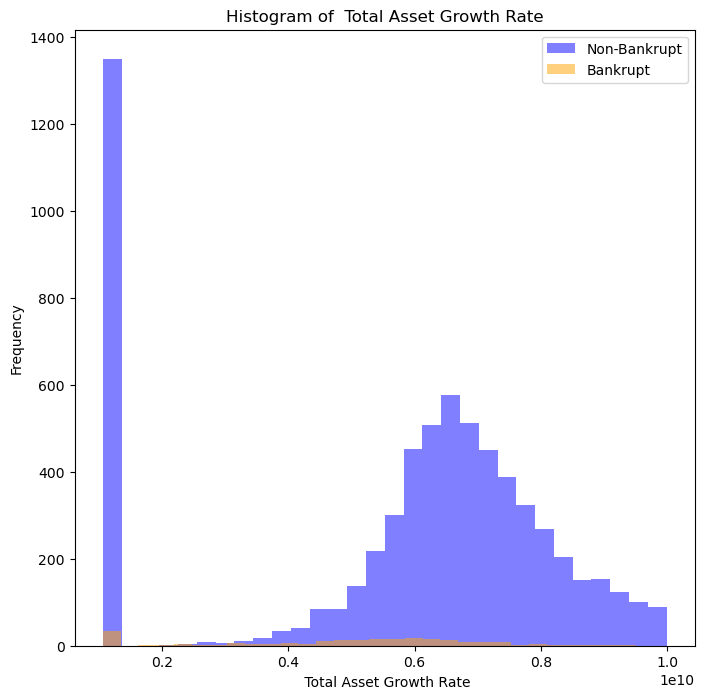

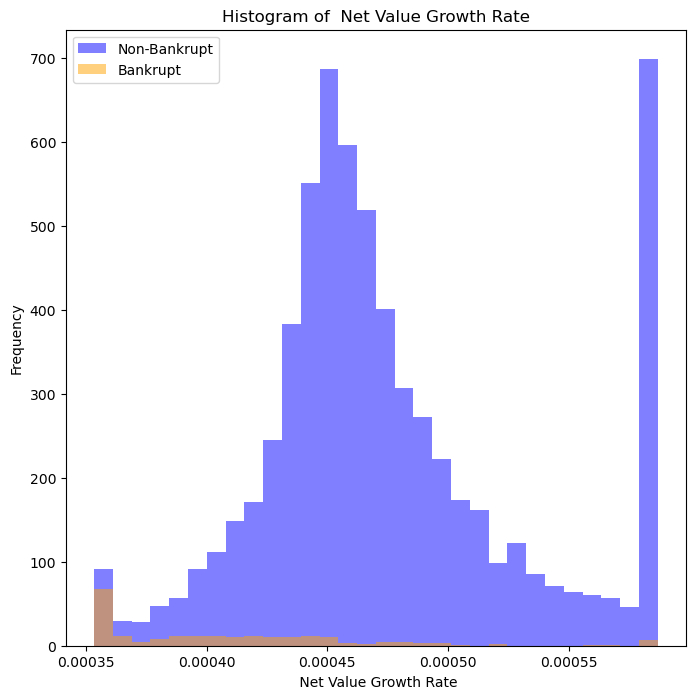

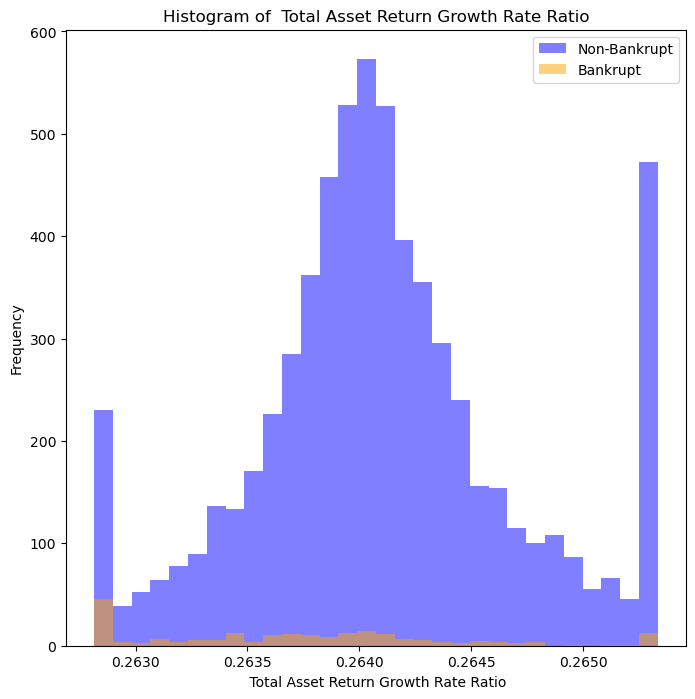

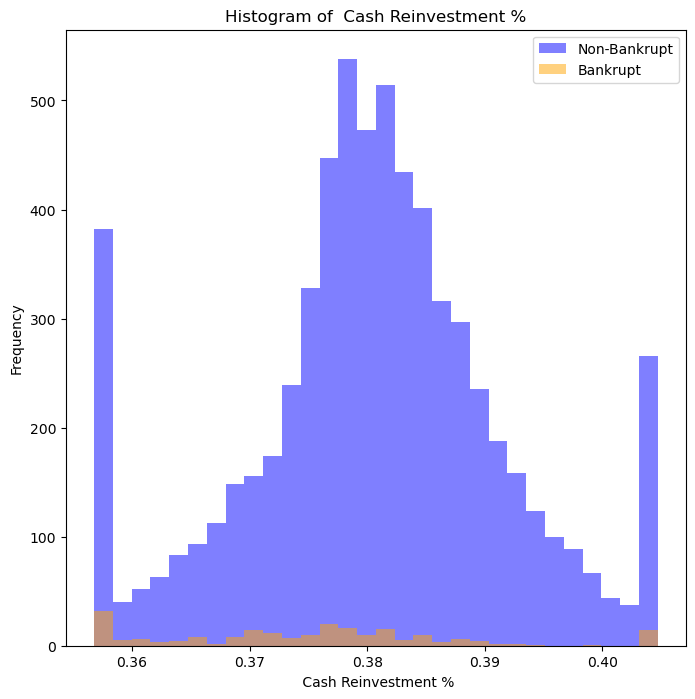

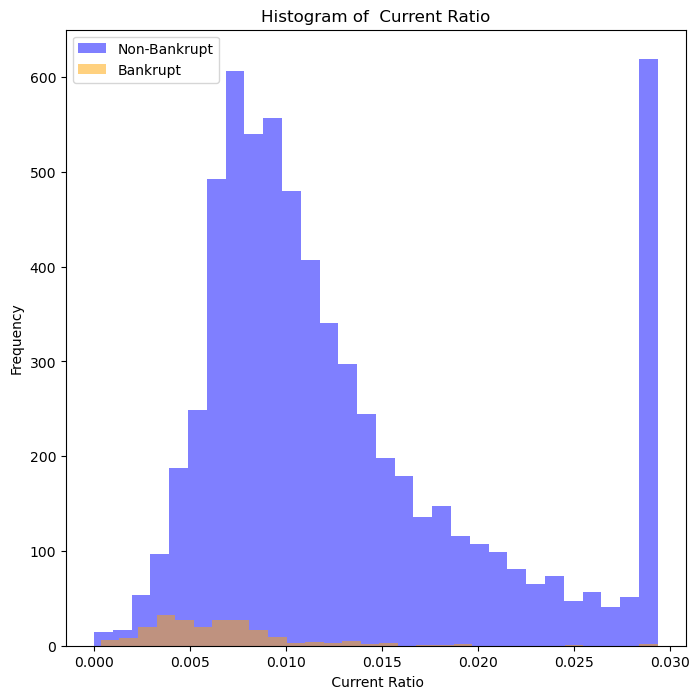

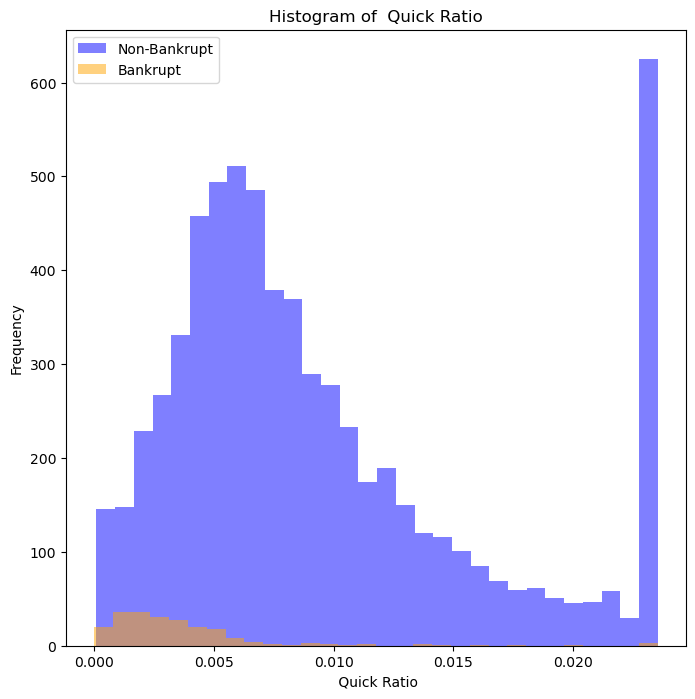

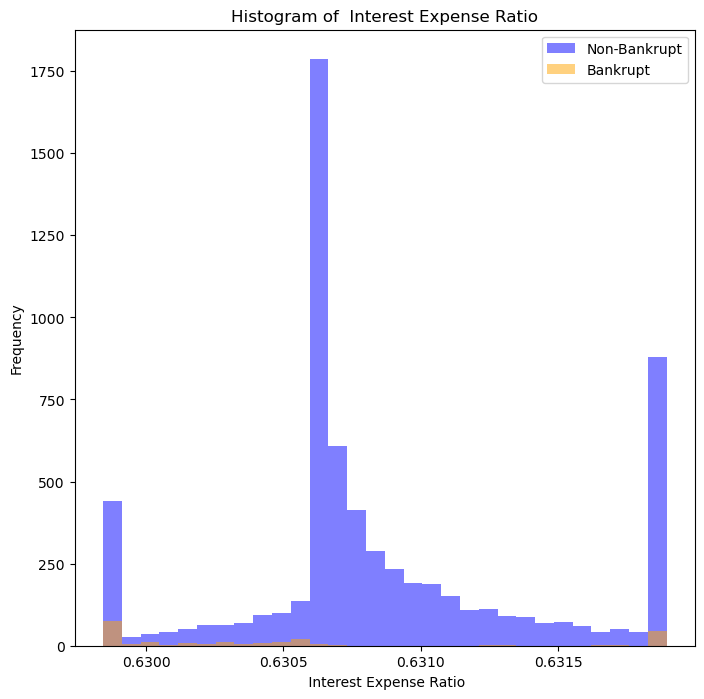

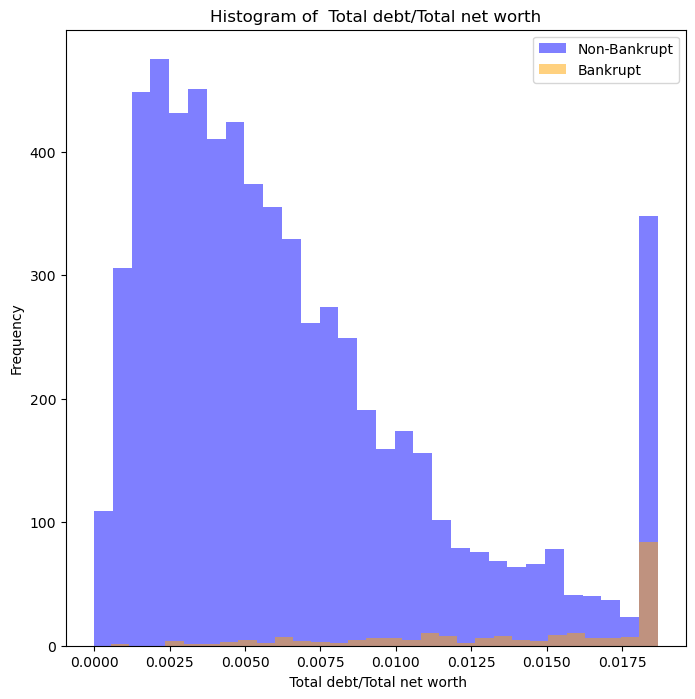

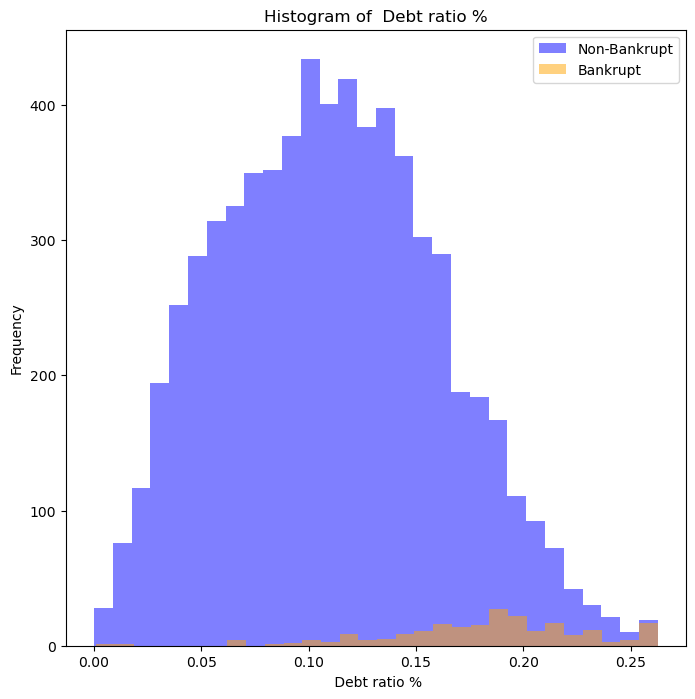

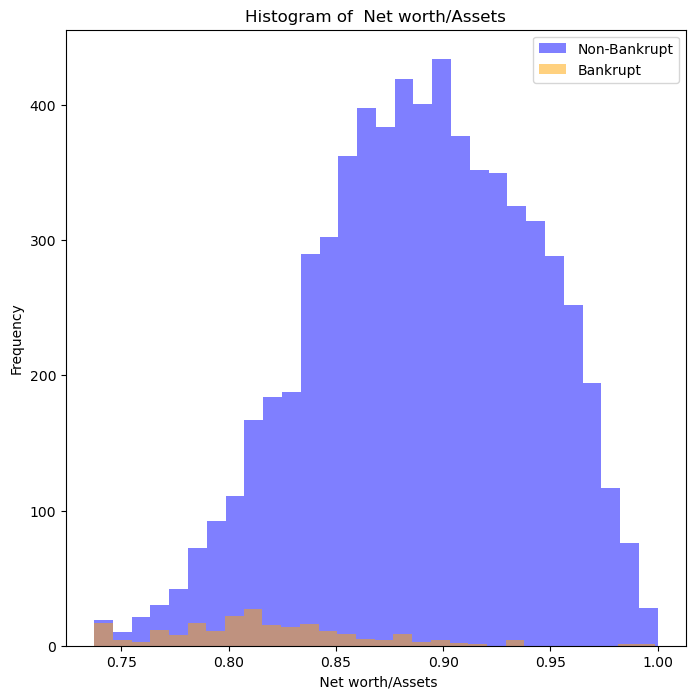

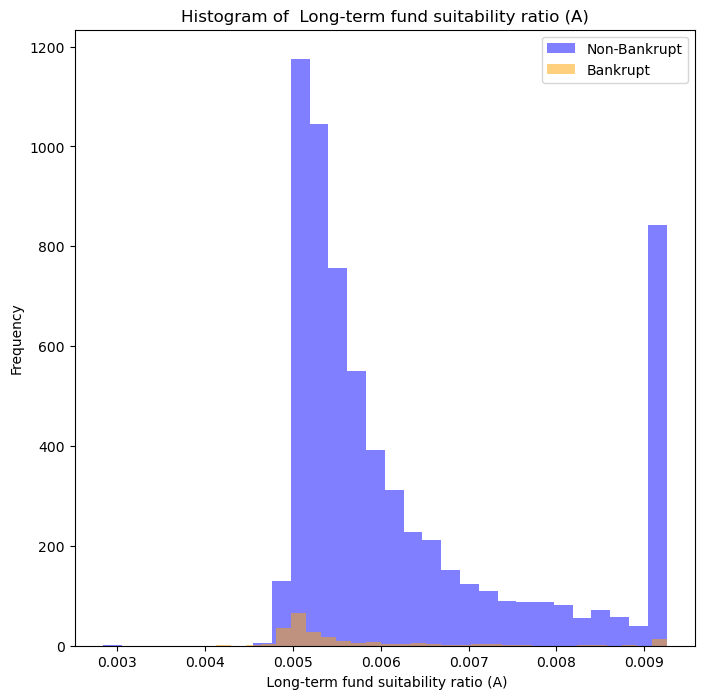

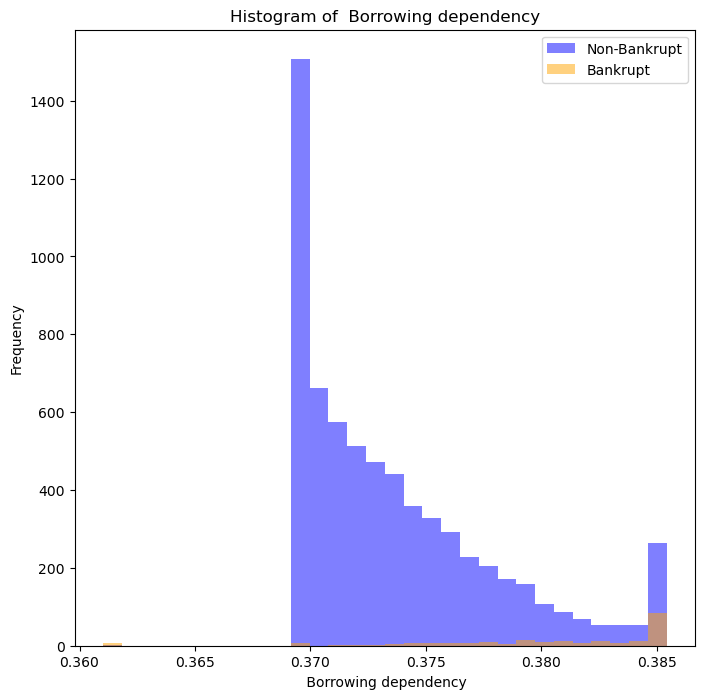

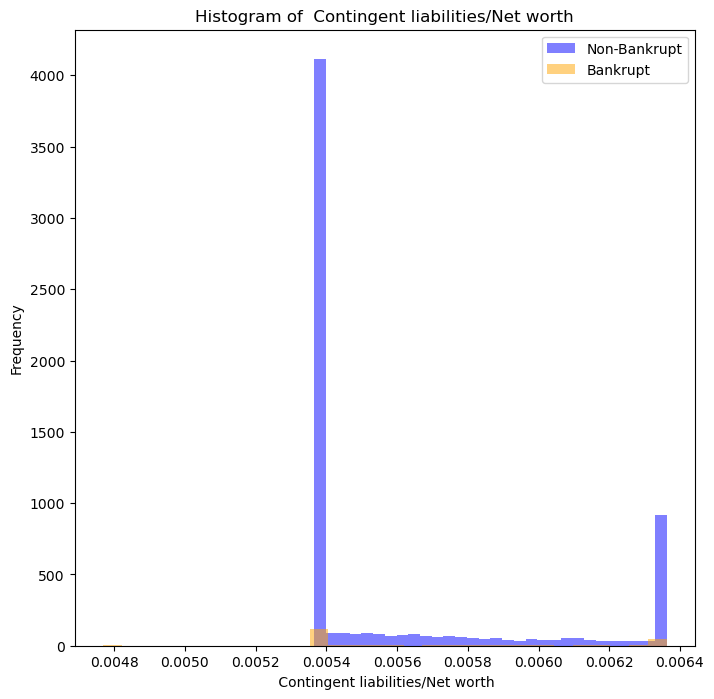

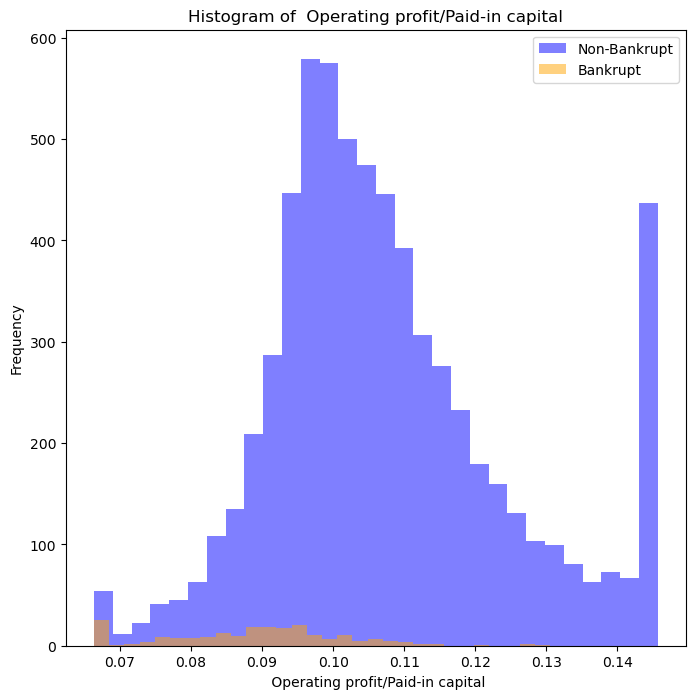

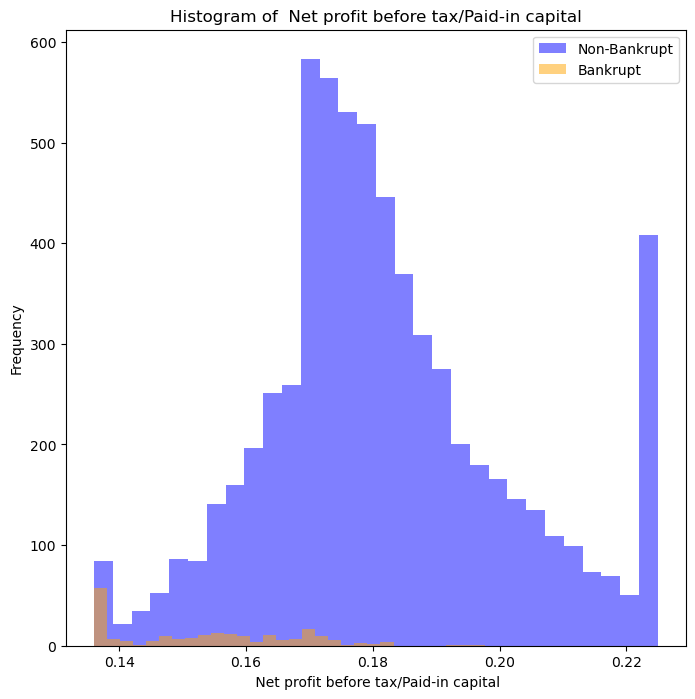

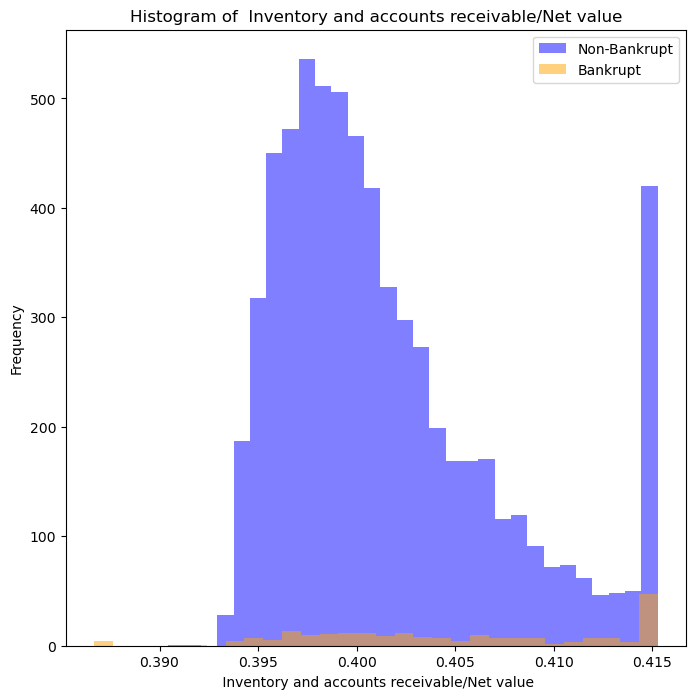

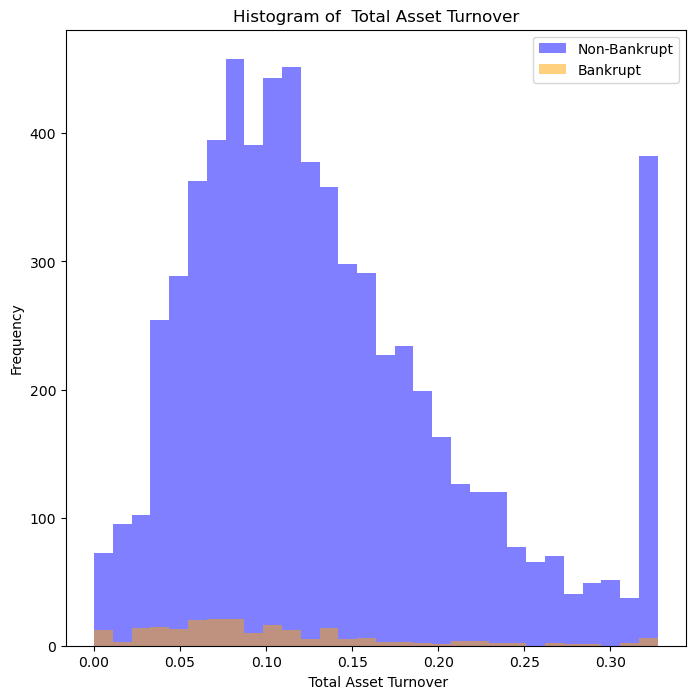

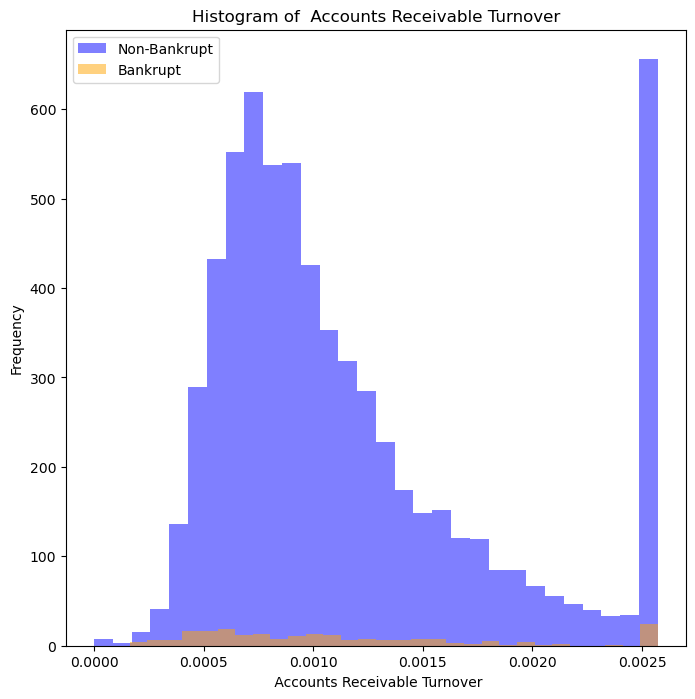

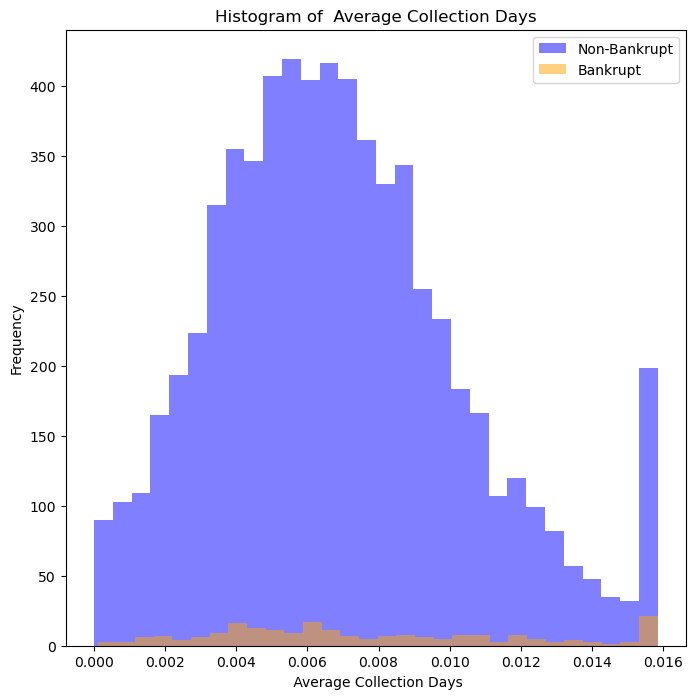

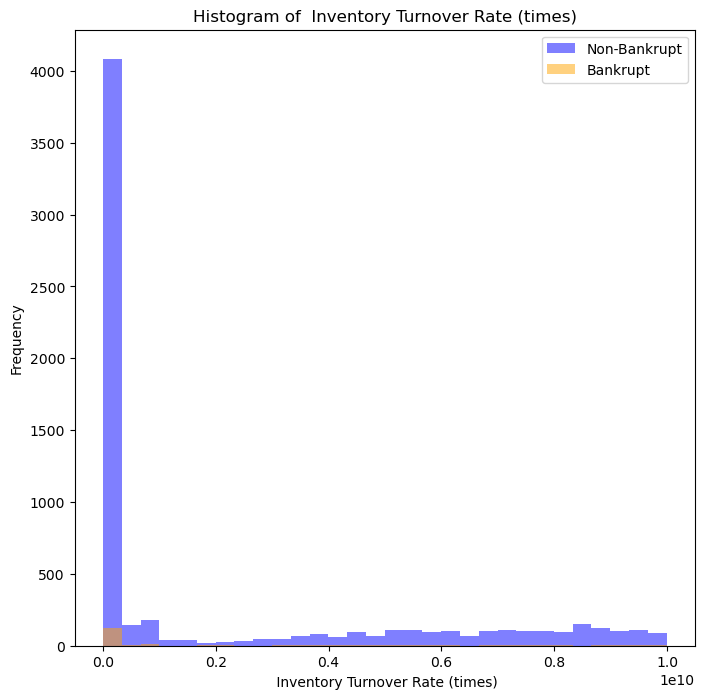

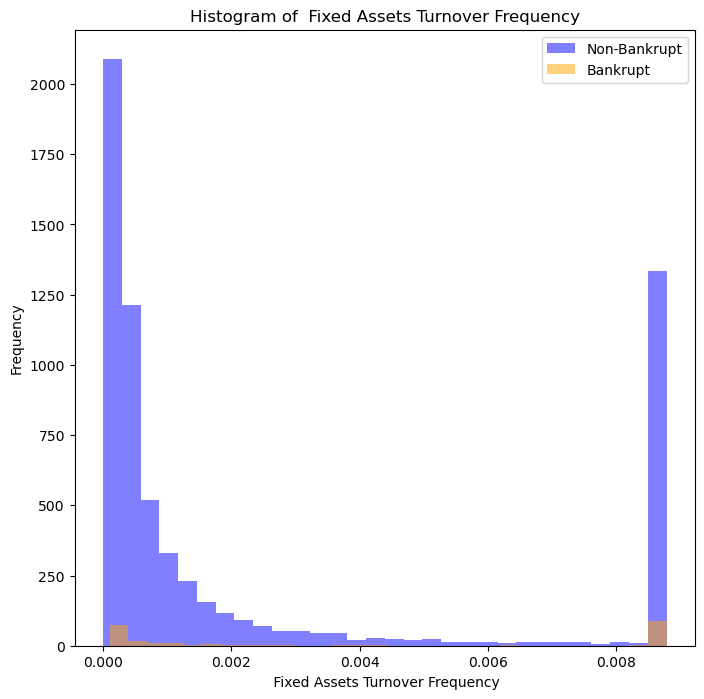

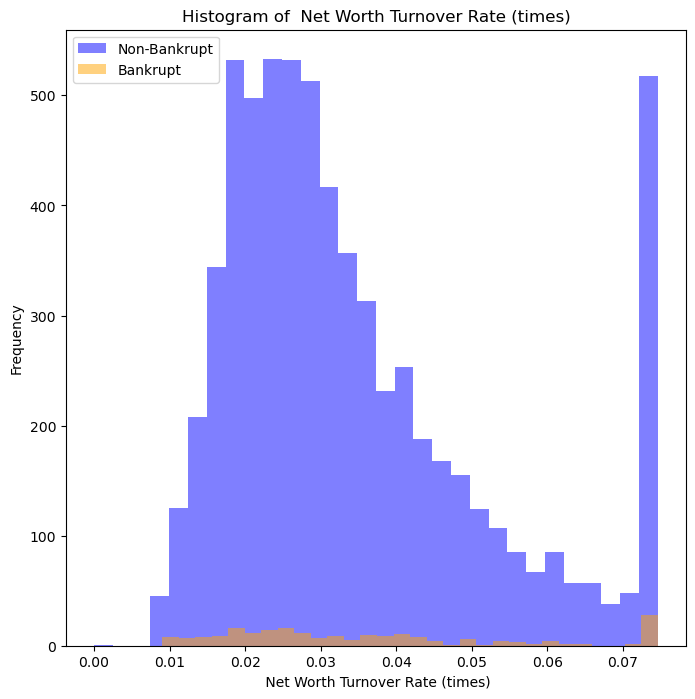

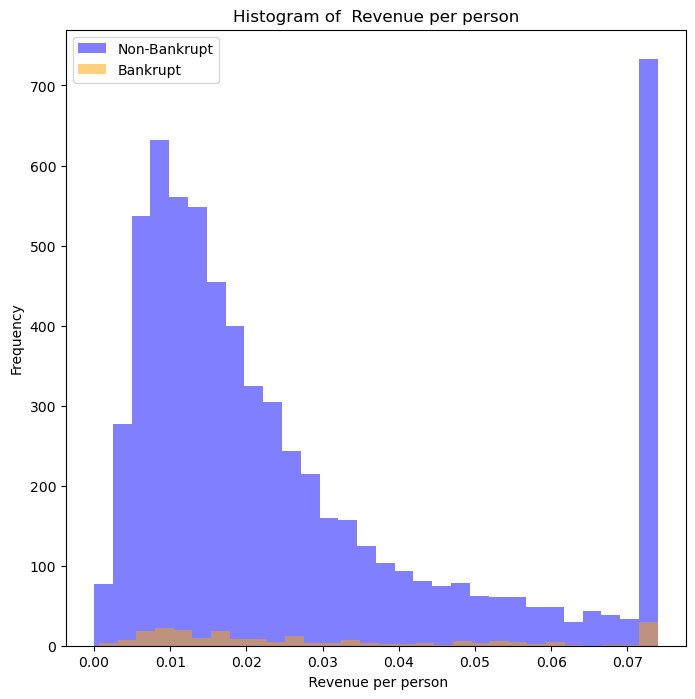

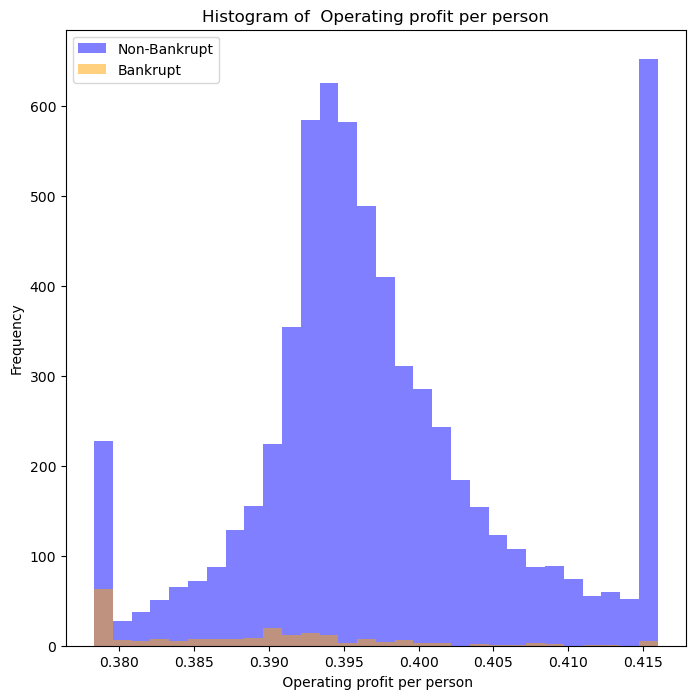

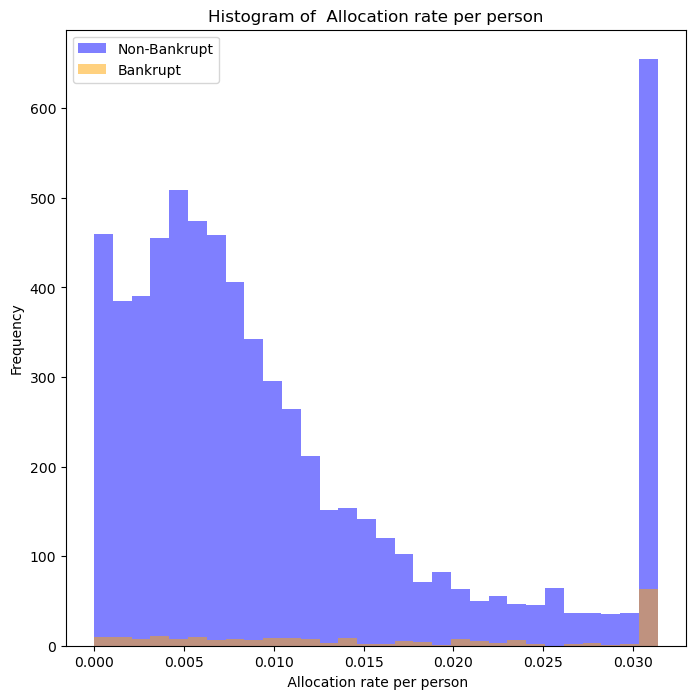

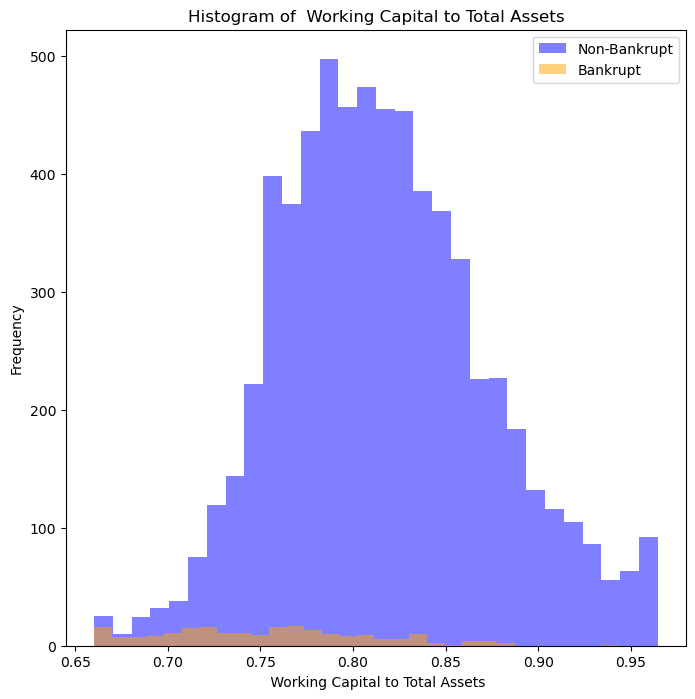

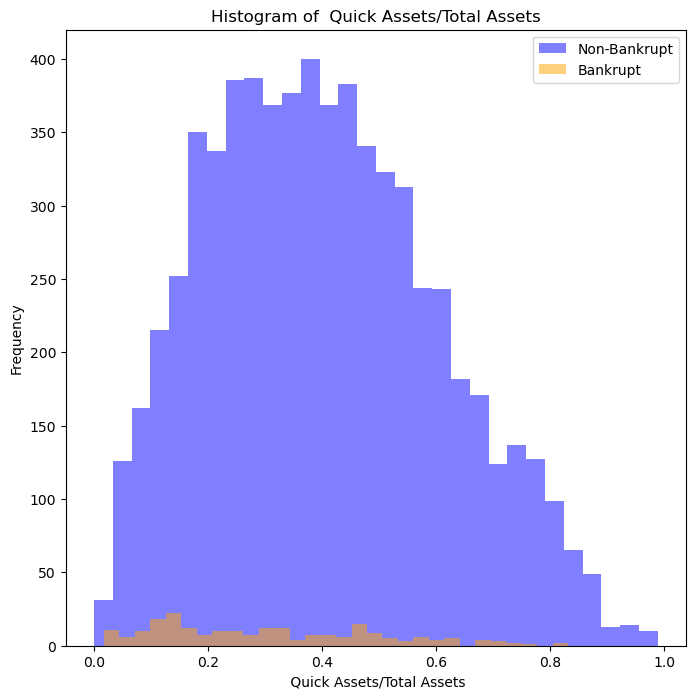

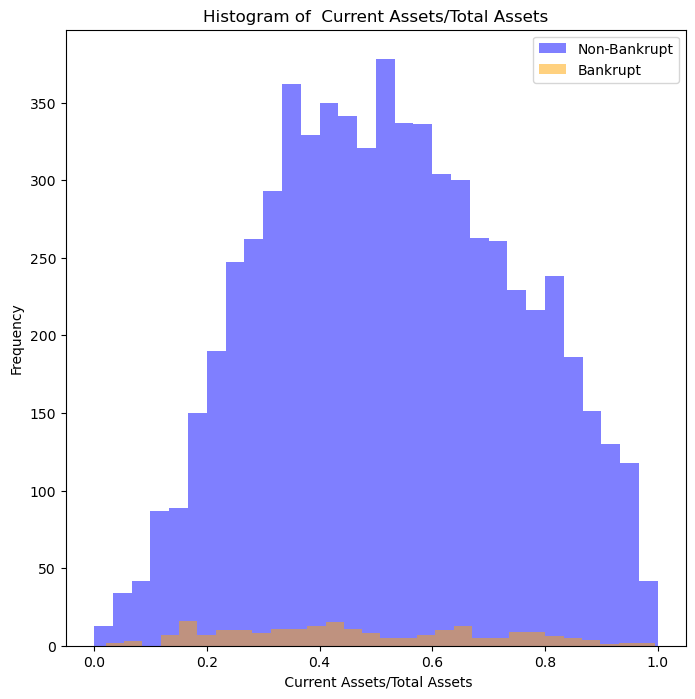

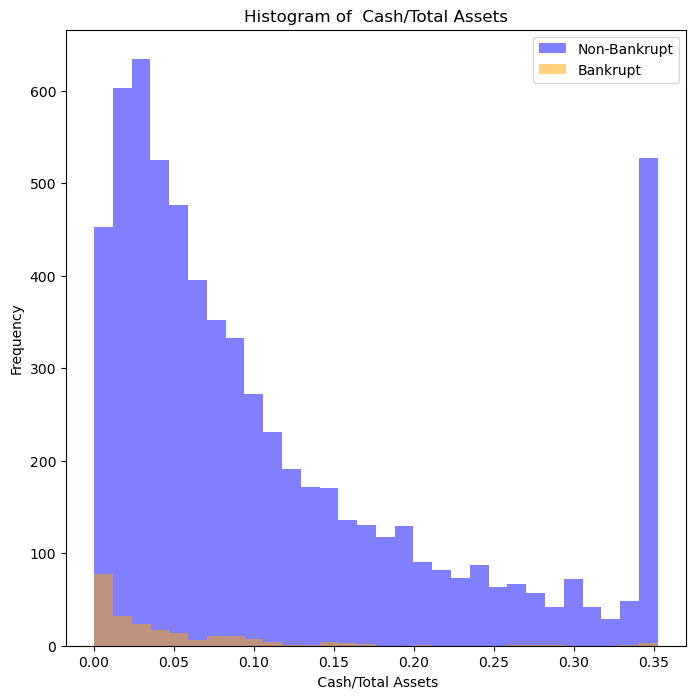

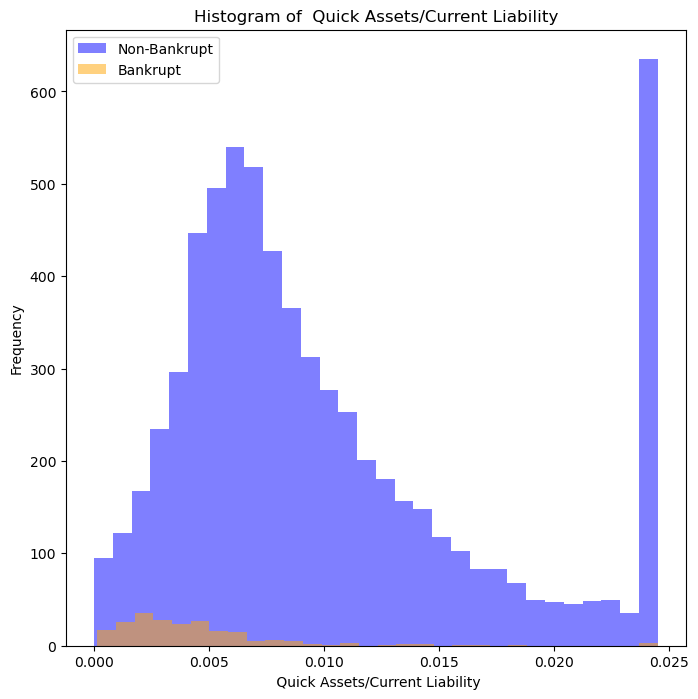

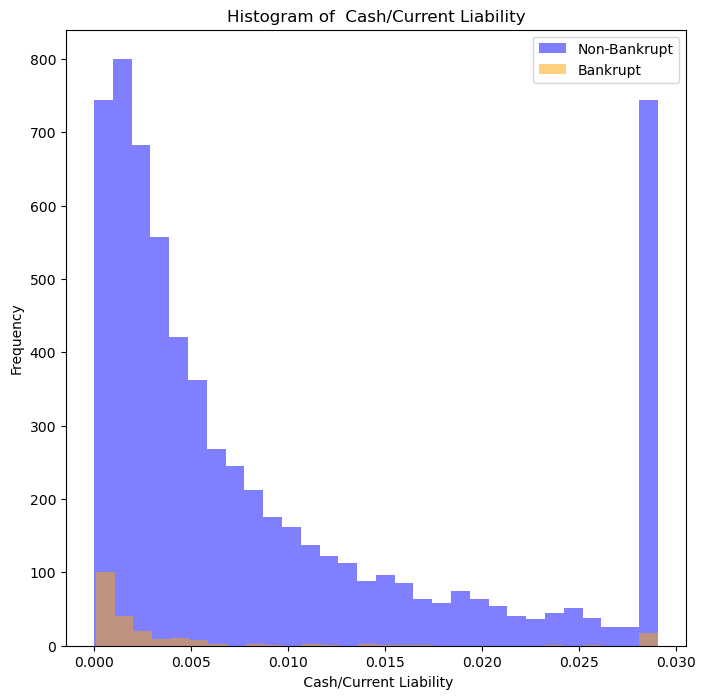

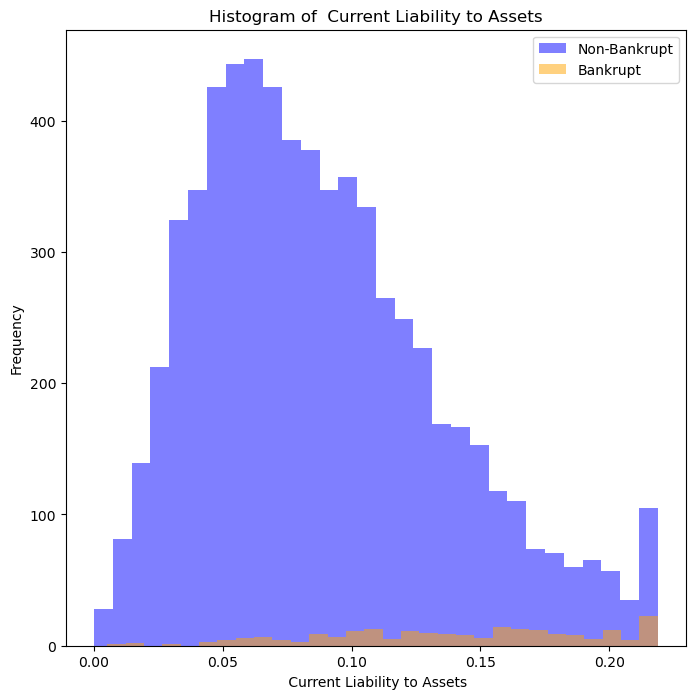

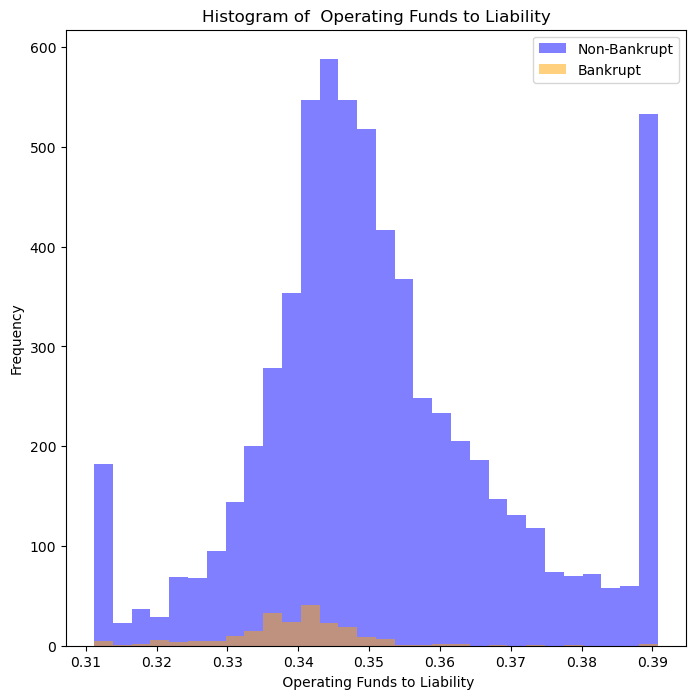

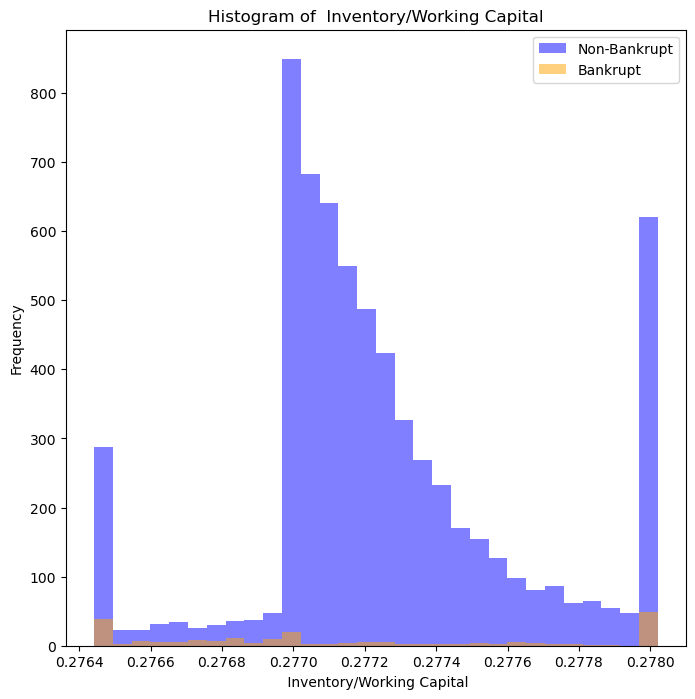

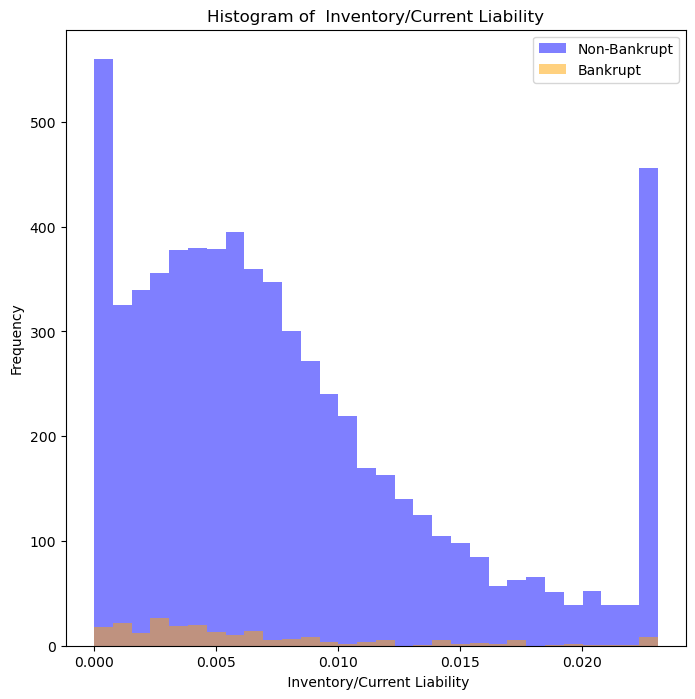

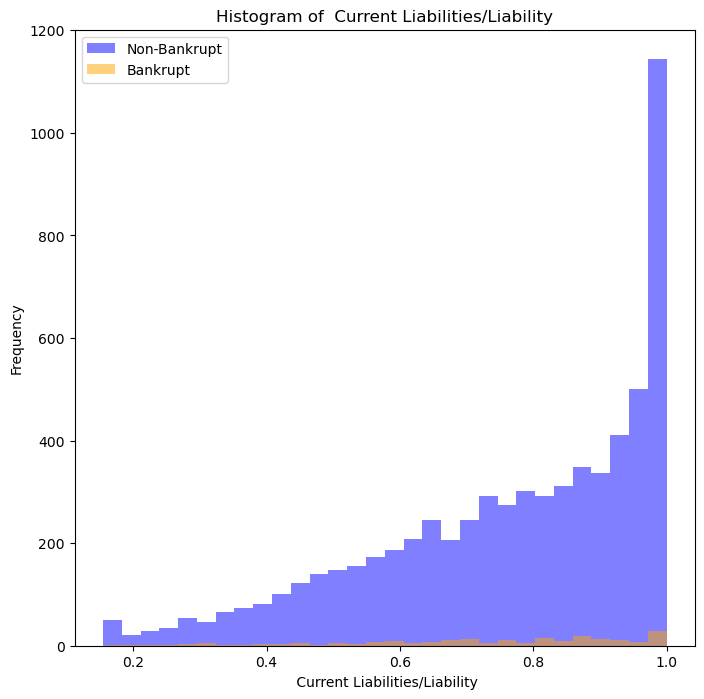

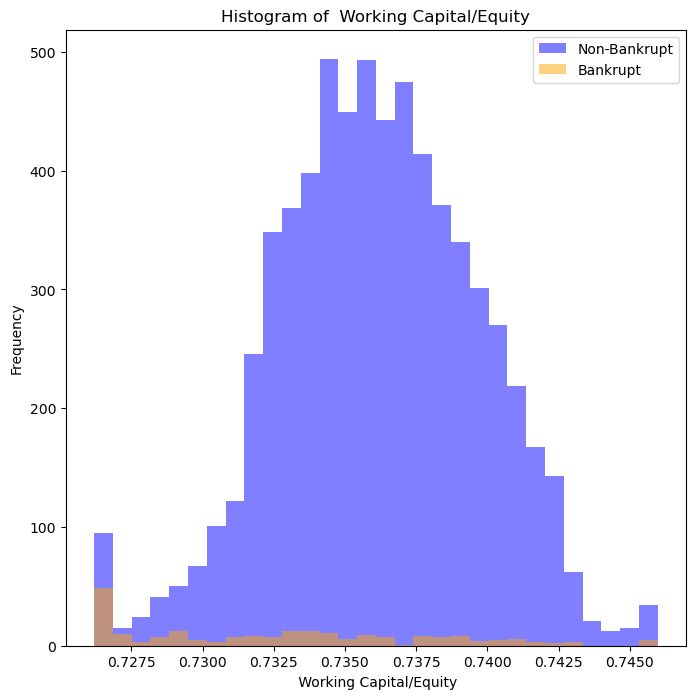

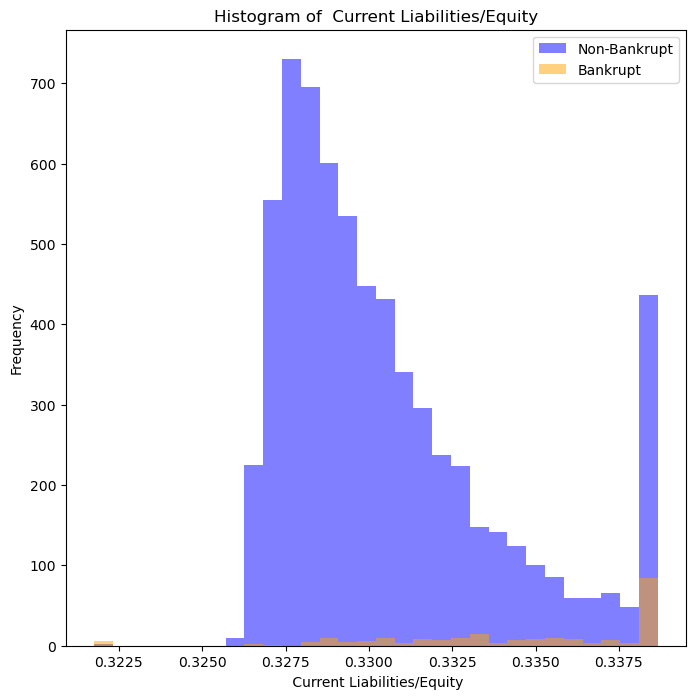

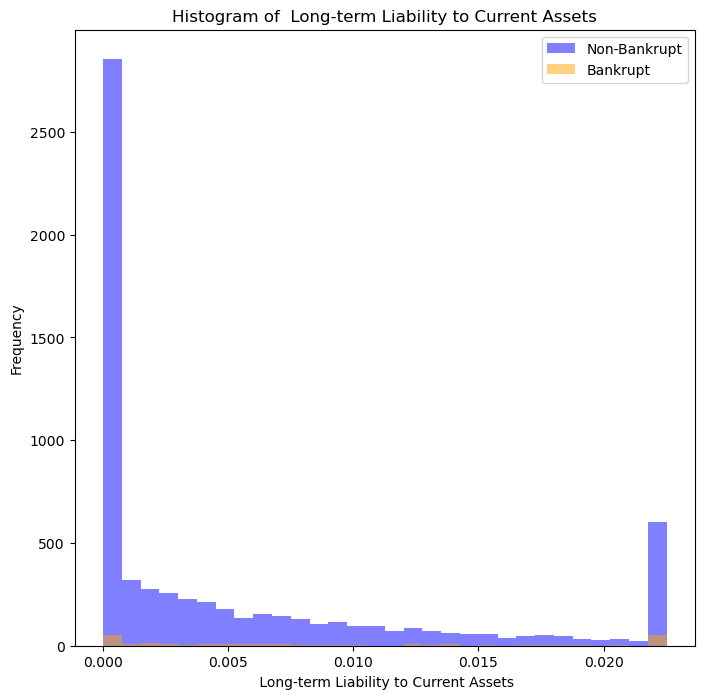

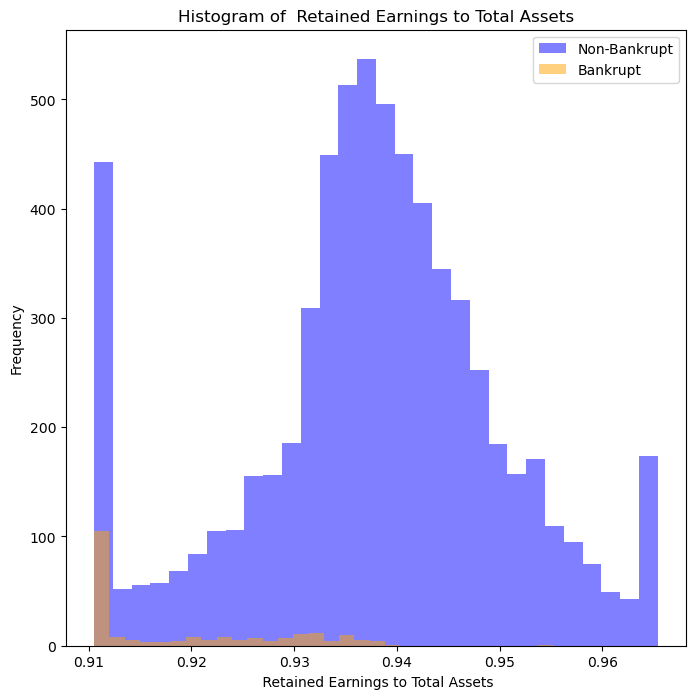

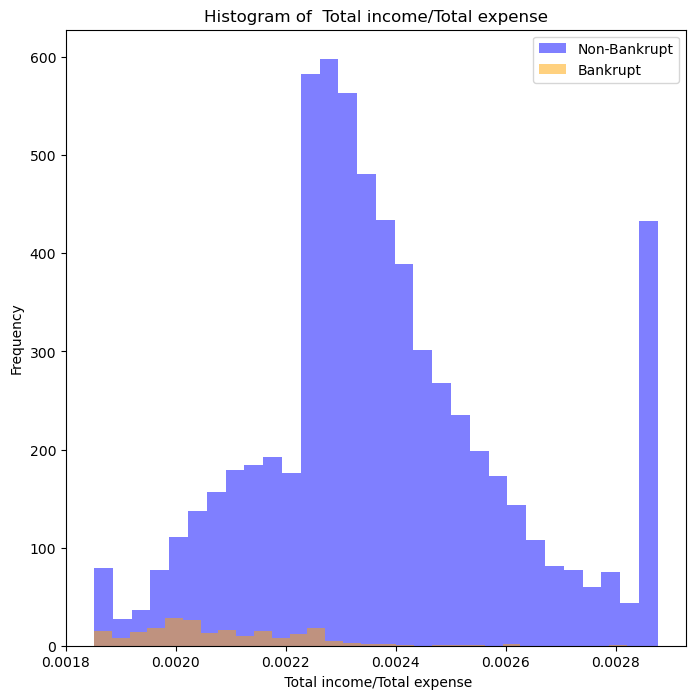

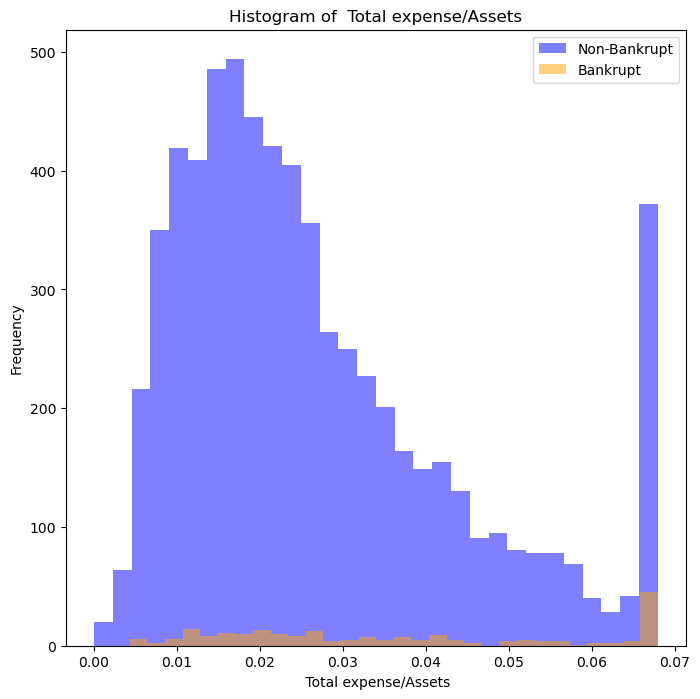

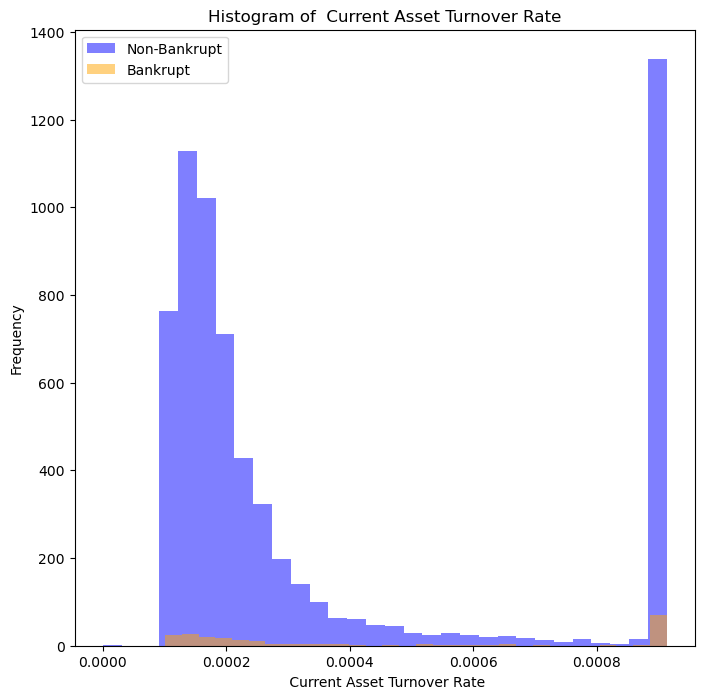

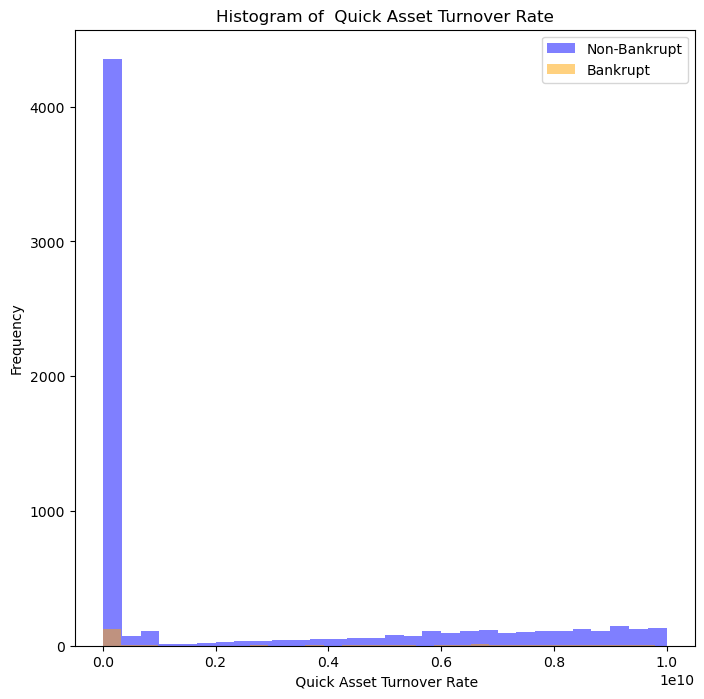

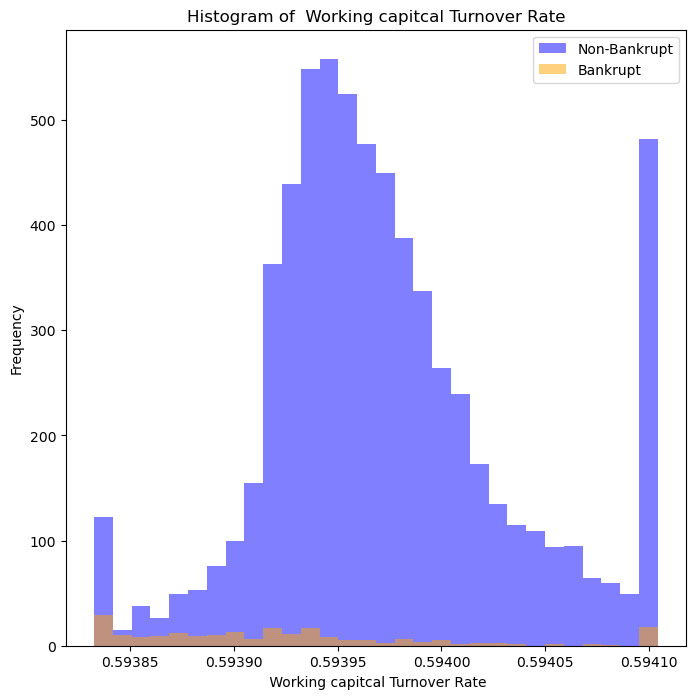

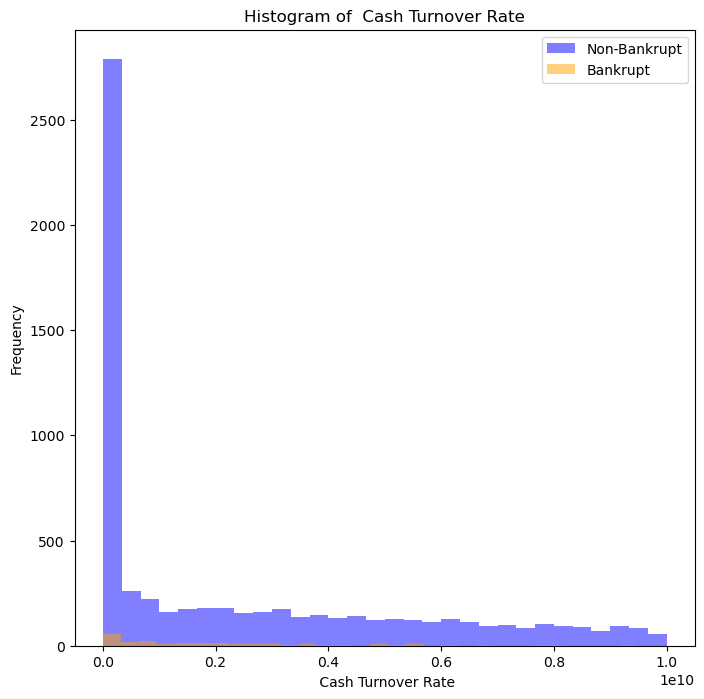

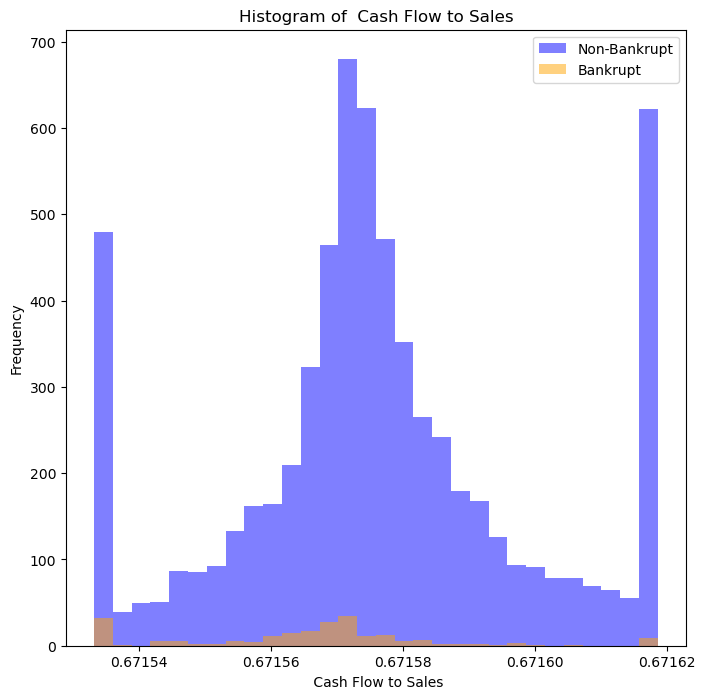

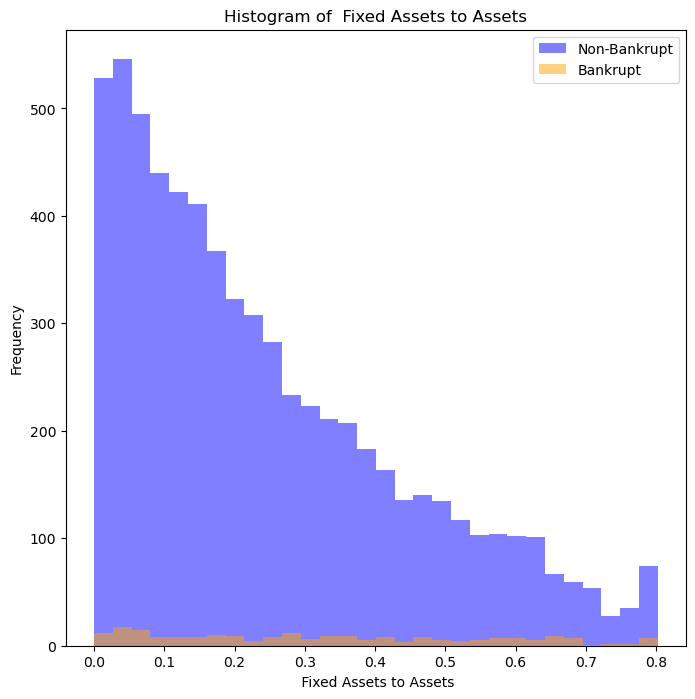

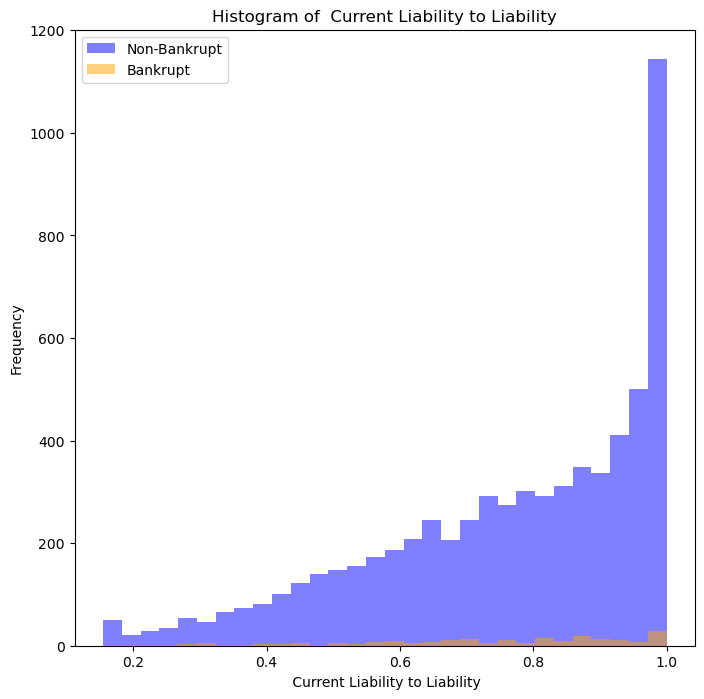

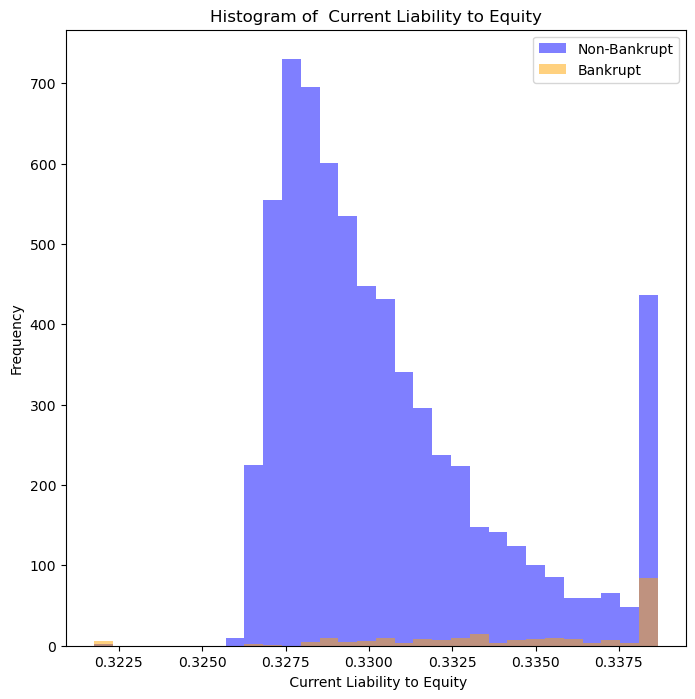

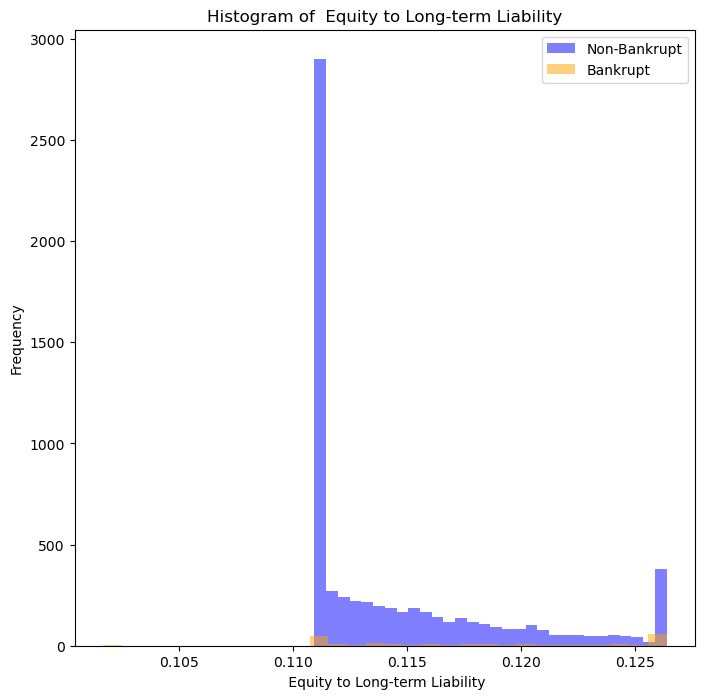

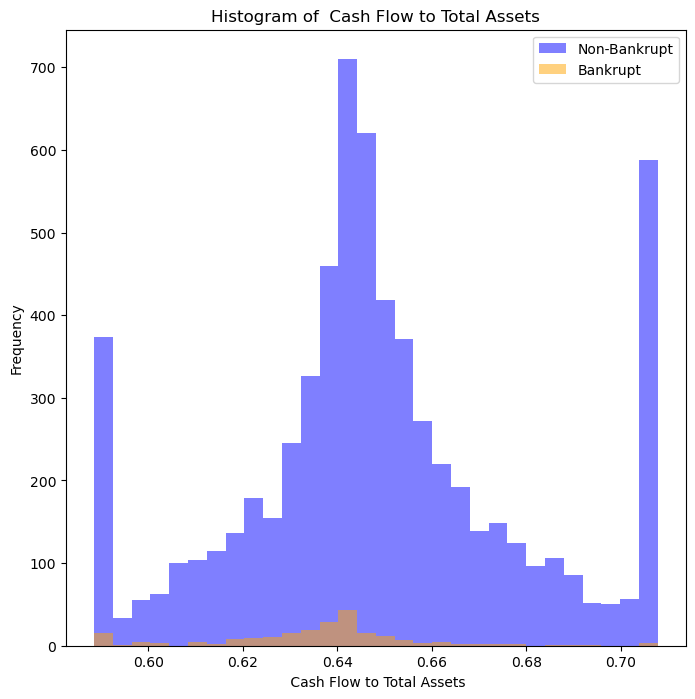

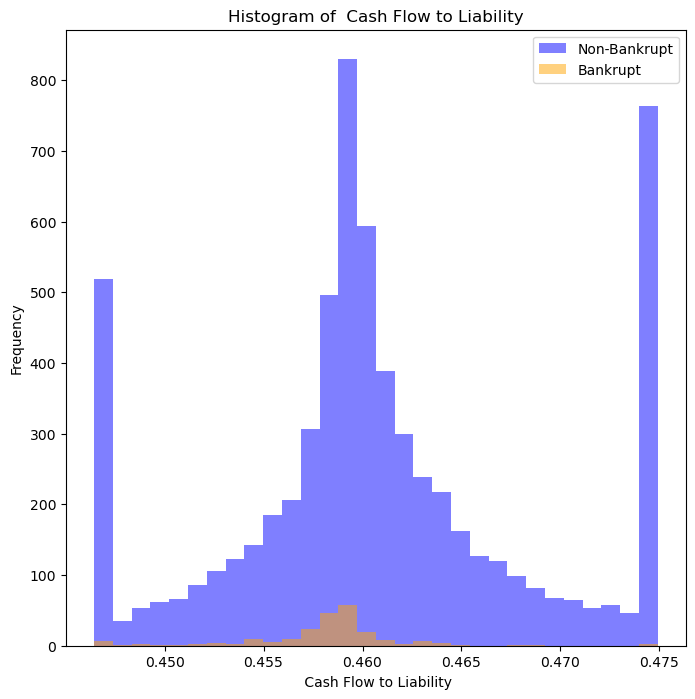

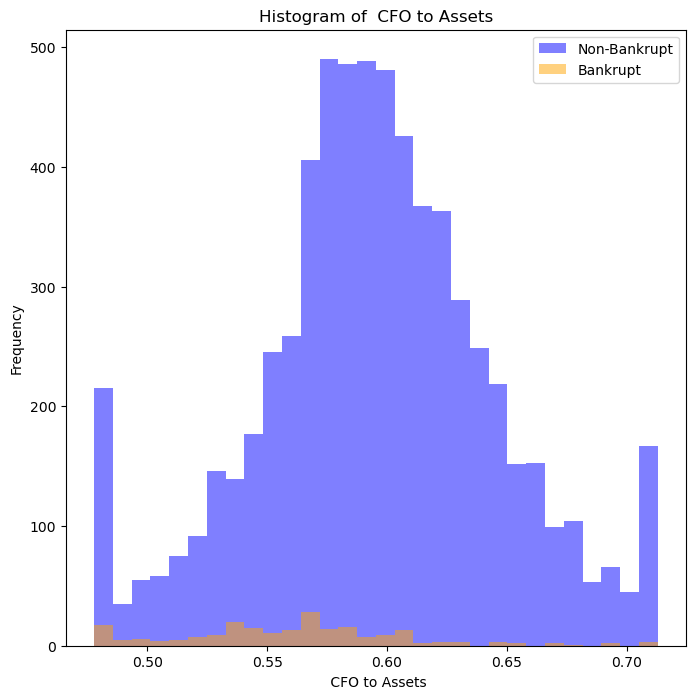

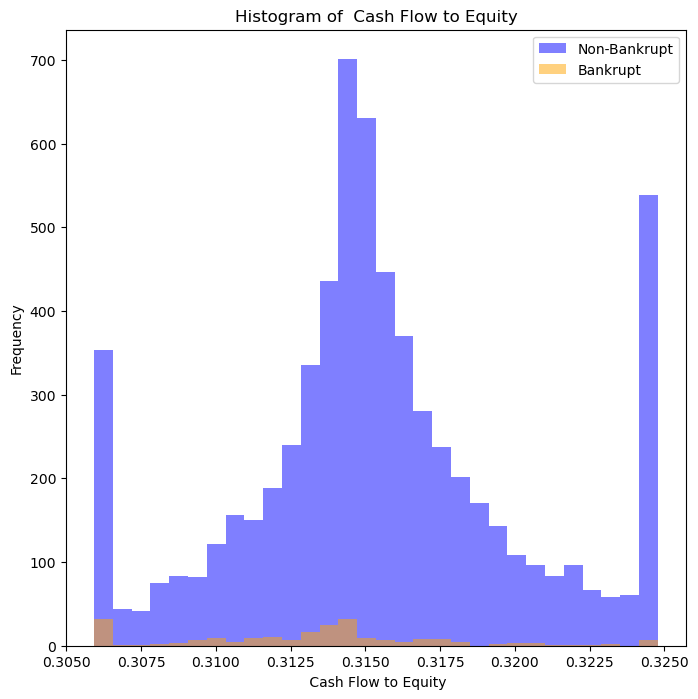

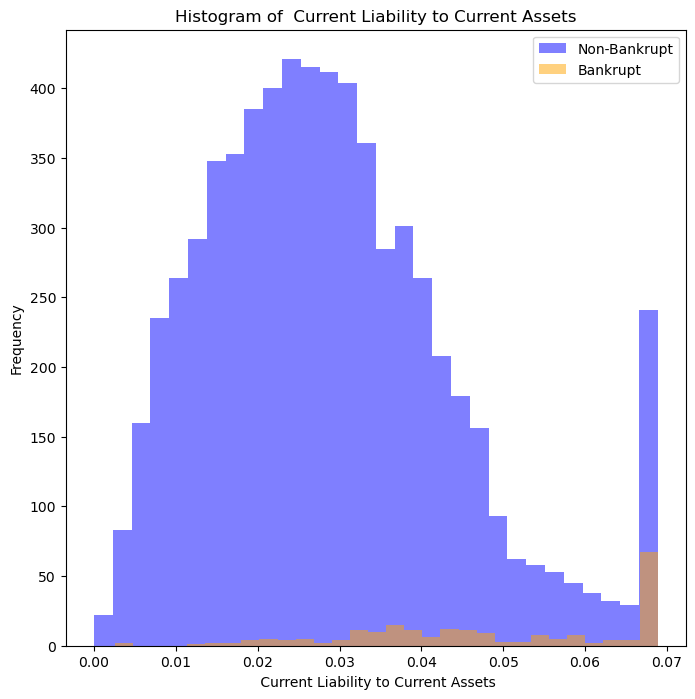

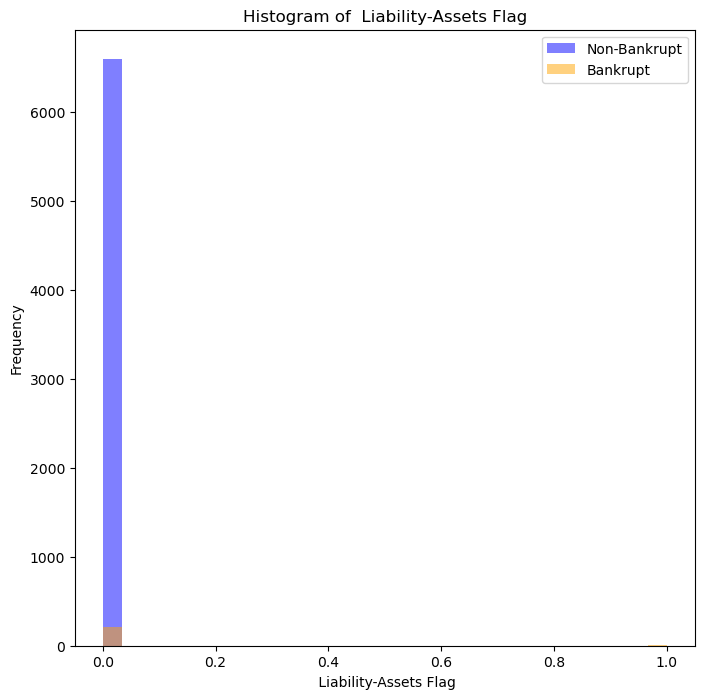

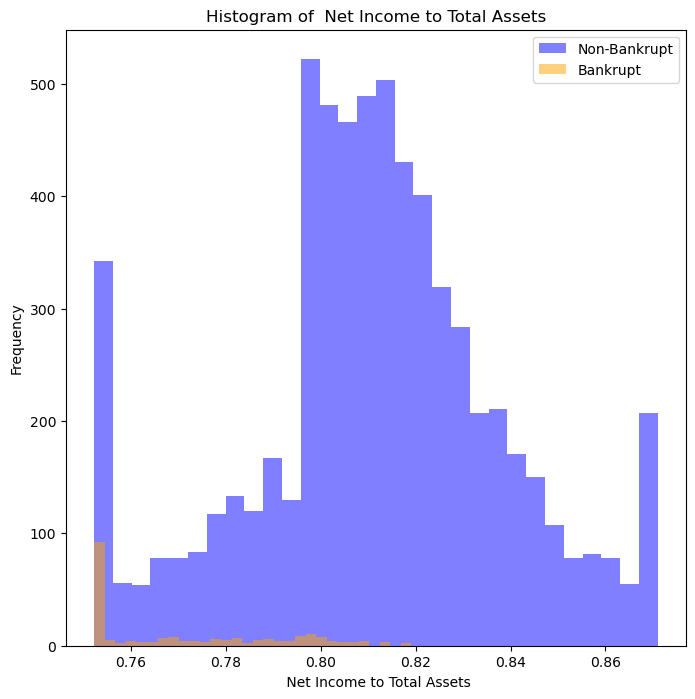

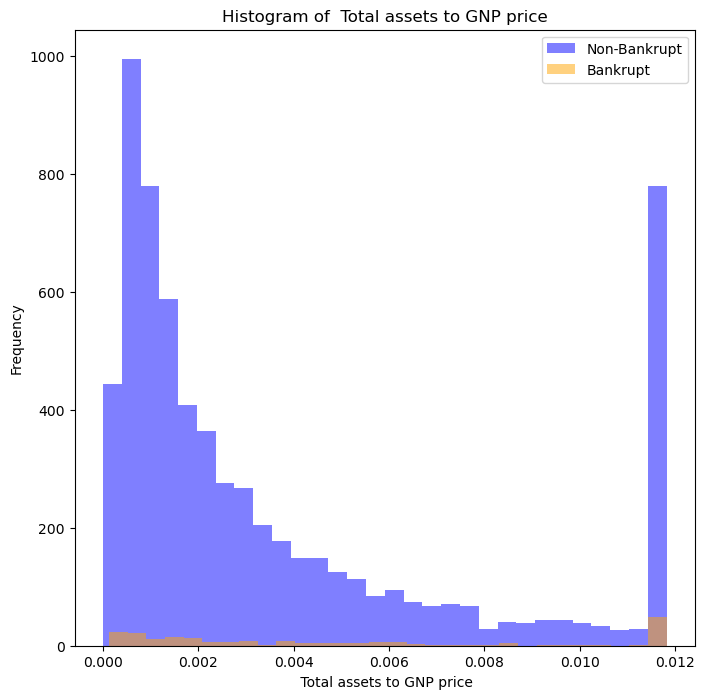

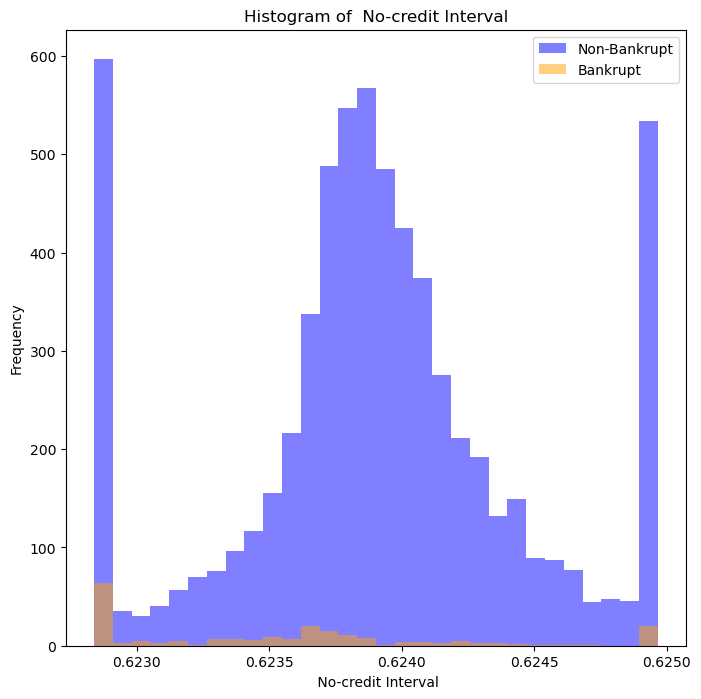

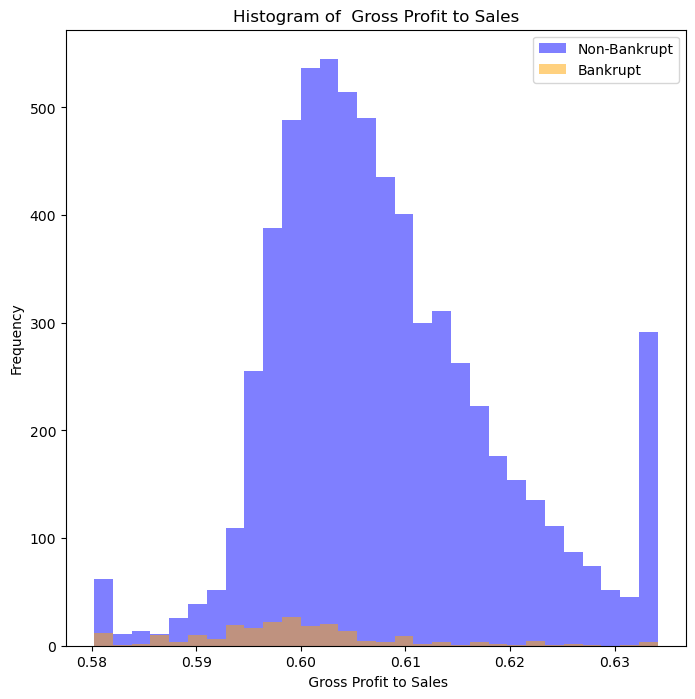

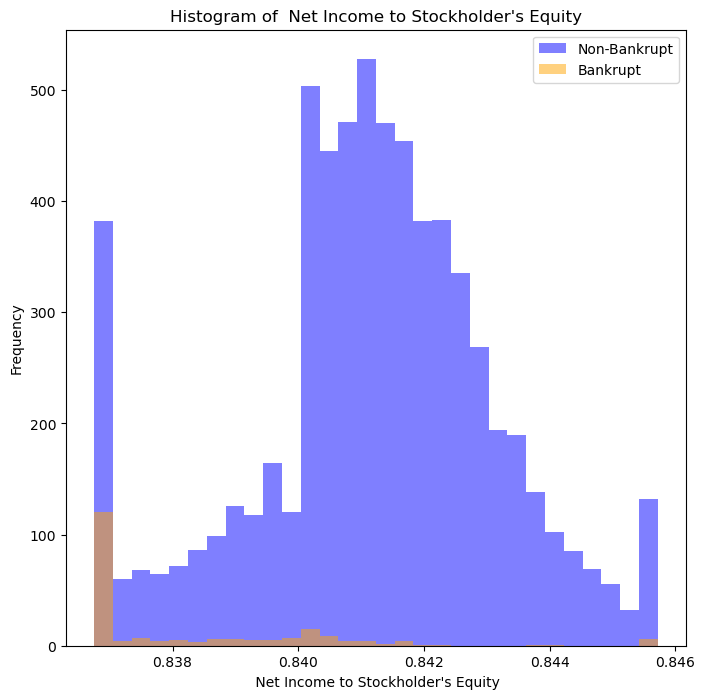

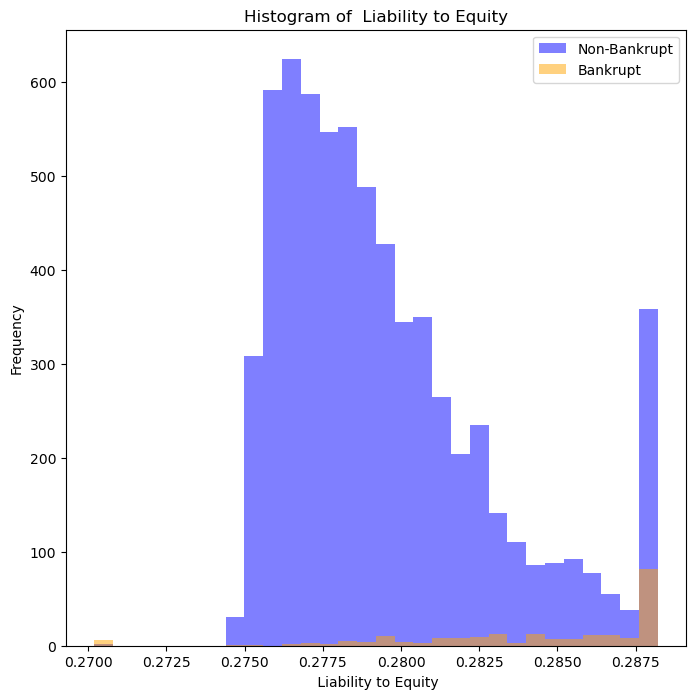

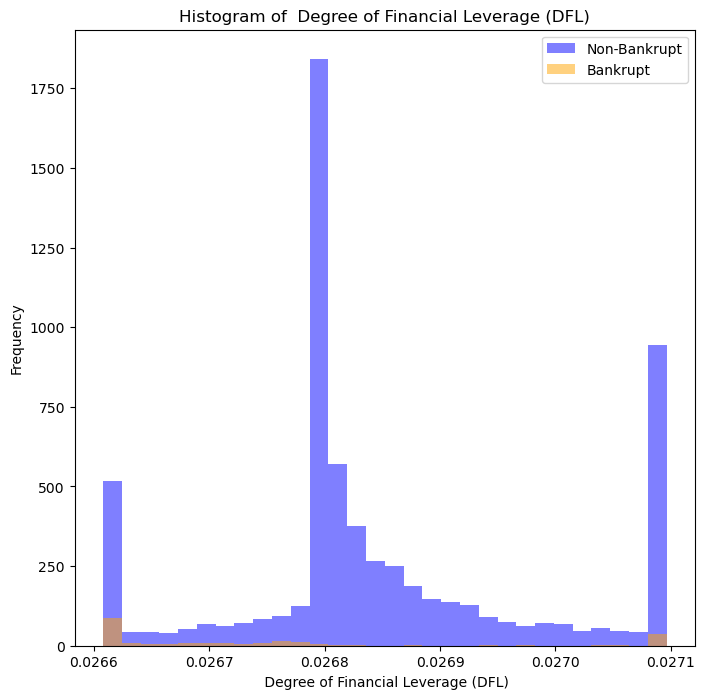

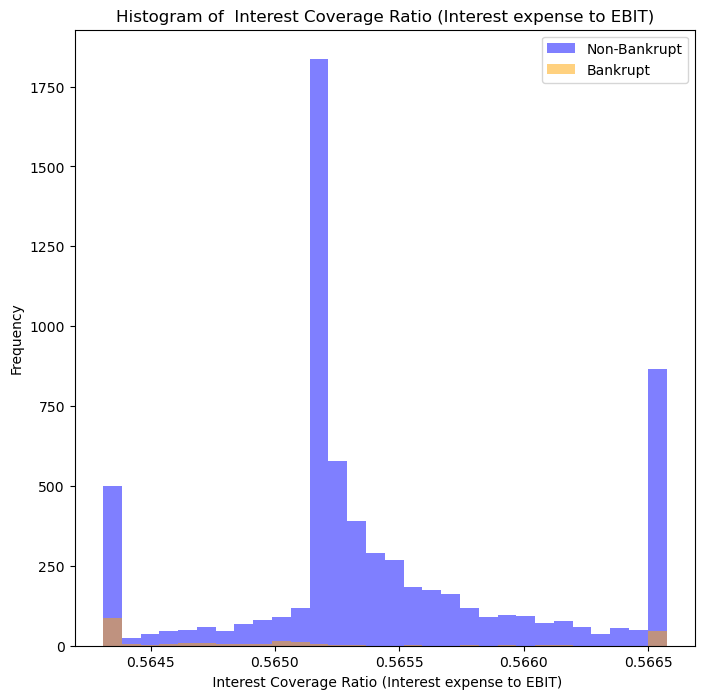

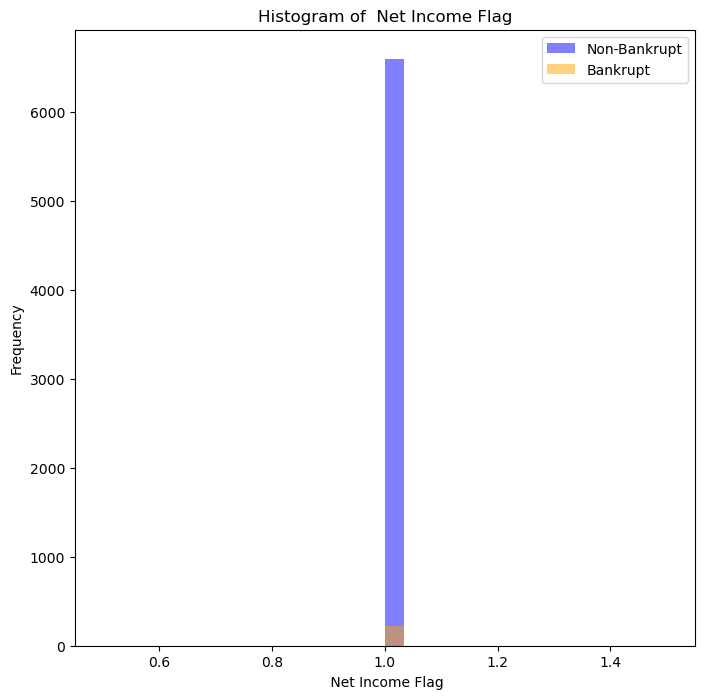

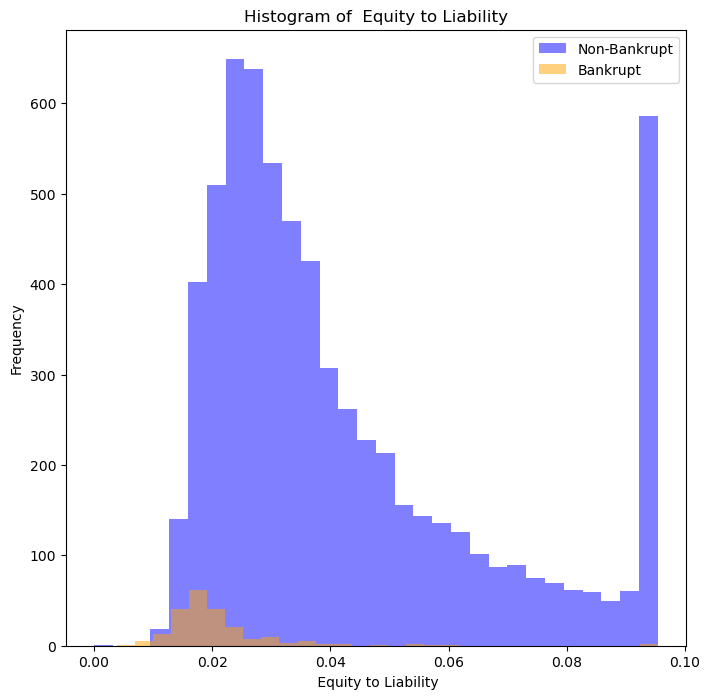

In [13]:
for column in df.columns:
    plt.figure(figsize=(8, 8))
    df[df['Bankrupt?'] == 0][column].plot(kind='hist', alpha=0.5, label='Non-Bankrupt', color='blue', bins=30)
    df[df['Bankrupt?'] == 1][column].plot(kind='hist', alpha=0.5, label='Bankrupt', color='orange', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

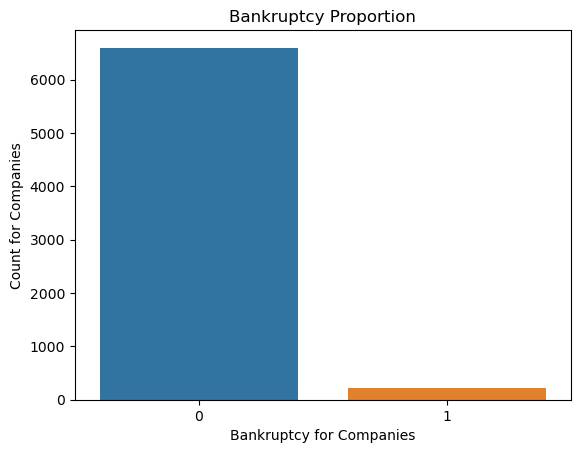

In [14]:

# Create the count plot
count_plot = sns.countplot(x=df['Bankrupt?'])

# Set the title and axis labels
count_plot.set_title('Bankruptcy Proportion')
count_plot.set_xlabel('Bankruptcy for Companies')
count_plot.set_ylabel('Count for Companies')

# Show the plot
plt.show()


In [15]:
corr_matrix=df.corr()

In [16]:
corr_matrix

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.239543   
 ROA(A) before interest and % after tax             -0.239500   
 ROA(B) before interest and depreciation after tax  -0.241993   
 Operating Gross Margin                             -0.140042   
...                                                       ...   
 Liability to Equity                                 0.246176   
 Degree of Financial Leverage (DFL)                 -0.129292   
 Interest Coverage Ratio (Interest expense to E...  -0.110761   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.161036   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.239543          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.941564          
 ROA(B) before interest and depreciation after tax                                           0.988614          
 Operating Gross Margin                                                                      0.471126          
...                                                                                               ...          
 Liability to Equity                                                                        -0.258969          
 Degree of Financial Leverage (DFL)                                                          0.111443          
 Interest Coverage Ratio (Interest expense to E...                                           0.099427          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.185974          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.239500   
 ROA(C) before interest and depreciation before...                                 0.941564   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.952666   
 Operating Gross Margin                                                            0.471641   
...                                                                                     ...   
 Liability to Equity                                                              -0.254115   
 Degree of Financial Leverage (DFL)                                                0.153120   
 Interest Coverage Ratio (Interest expense to E...                                 0.140903   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.186650   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.241993    
 ROA(C) before interest and depreciation before...                                           0.988614    
 ROA(A) before interest and % after tax                                                      0.952666    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.481338    
...                                                                                               ...    
 Liability to Equity                       

<Axes: >

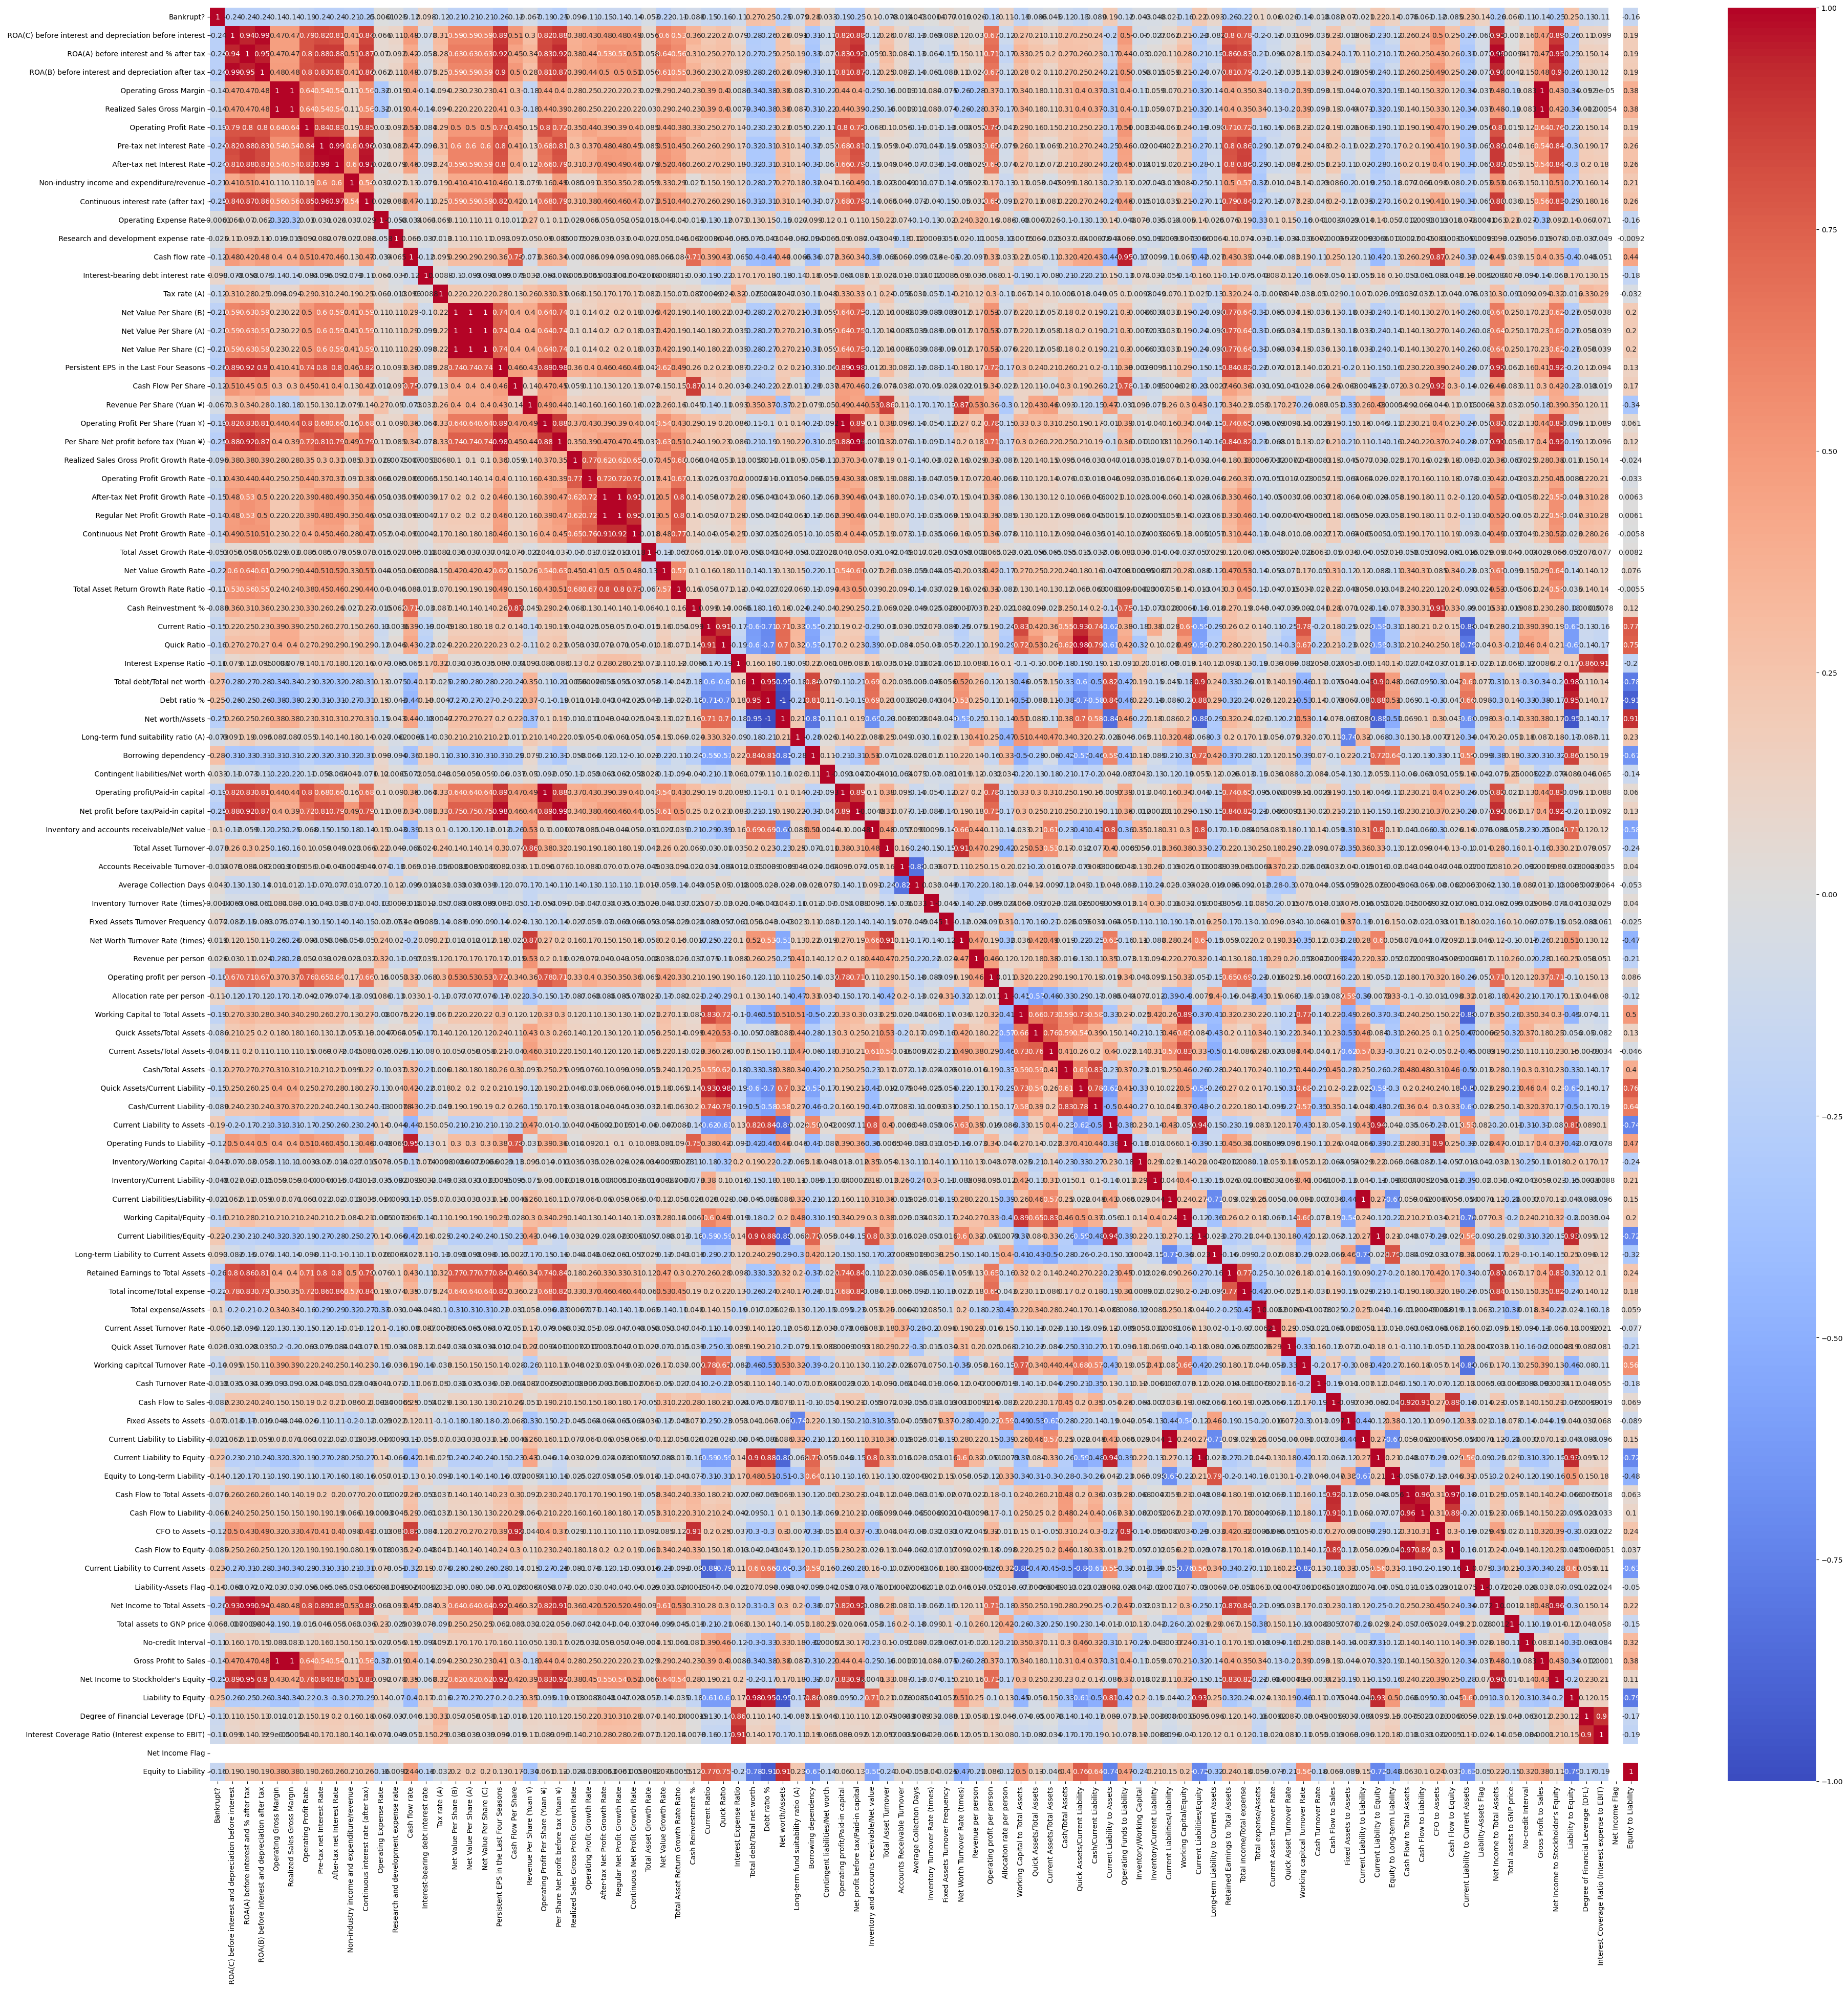

In [17]:
plt.figure(figsize=(45,45))
corr_matrix= df.corr() # calculate the correlation coeficient
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

Analyze relationships between features and the target variable.

o Perform hypothesis testing to identify significant features influencing bankruptcy.

In [31]:
from scipy.stats import ttest_ind

# Hypothesis testing for feature selection
significant_features = []
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt?':
        bankrupt = df[df['Bankrupt?'] == 1][column]
        non_bankrupt = df[df['Bankrupt?'] == 0][column]
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
        if p_val < 0.05:        # if null hypothesis is rejected select that column
            significant_features.append(column)
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {len(significant_features)}')

significant_features.append('Bankrupt?')  

 ROA(C) before interest and depreciation before interest: t-statistic=-20.371000246550334, p-value=1.3480464196848798e-89
 ROA(A) before interest and % after tax: t-statistic=-20.36708962978169, p-value=1.453424003163958e-89
 ROA(B) before interest and depreciation after tax: t-statistic=-20.59226229040652, p-value=1.867512034084068e-91
 Operating Gross Margin: t-statistic=-11.677652430250529, p-value=3.2823739125123346e-31
 Realized Sales Gross Margin: t-statistic=-11.61220032059553, p-value=6.967922607227421e-31
 Operating Profit Rate: t-statistic=-16.315267033012436, p-value=9.863440509107752e-59
 Pre-tax net Interest Rate: t-statistic=-20.235075270990965, p-value=1.8306696788047566e-88
 After-tax net Interest Rate: t-statistic=-20.365632811201365, p-value=1.4947479061257782e-89
 Non-industry income and expenditure/revenue: t-statistic=-18.132844472521544, p-value=8.370733607811912e-72
 Continuous interest rate (after tax): t-statistic=-21.189549801114605, p-value=1.4678863402201738

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
data = df[significant_features]

In [34]:
df['New_Feature'] = df['_ROA(C)_before_interest_and_depreciation_before_interest'] / df['_Operating_Gross_Margin']

KeyError: '_ROA(C)_before_interest_and_depreciation_before_interest'

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_features = pca.fit_transform(df1[significant_features])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(df[significant_features], df1['Bankrupt'])
selected_features = [feature for feature, support in zip(significant_features, fit.support_) if support]
print(f'Selected features: {selected_features}')

In [ ]:
pip install imblearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(df1[selected_features], df1['Bankrupt'], test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
coefficients = pd.DataFrame(model.coef_.T, index=selected_features, columns=['Coefficient'])
print(coefficients)

# Sort coefficients to understand feature impact
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients_sorted)

In [22]:
selected_features = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Operating Gross Margin',
    ' Realized Sales Gross Margin',
    ' Operating Profit Rate',
    ' Pre-tax net Interest Rate',
    ' After-tax net Interest Rate',
    ' Non-industry income and expenditure/revenue',
    ' Continuous interest rate (after tax)',
    ' Operating Expense Rate'
]
X = df[selected_features]
y = df['Bankrupt?']

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (for intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

         Current function value: 2.915303
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5443
Method:                           MLE   Df Model:                           11
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  -20.10
Time:                        22:14:10   Log-Likelihood:                -15903.
converged:                      False   LL-Null:                       -753.53
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                               

C:\Users\user\AppData\Local\Temp\ipykernel_5984\4069476625.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
#feature selection

In [20]:
from sklearn.ensemble import RandomForestClassifier

X = Bank_Details.drop(['Bankrupt?'], axis=1)
y = Bank_Details['Bankrupt?']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

 ROA(C) before interest and depreciation before interest    0.013486
 ROA(A) before interest and % after tax                     0.009160
 ROA(B) before interest and depreciation after tax          0.009693
 Operating Gross Margin                                     0.009223
 Realized Sales Gross Margin                                0.008934
                                                              ...   
 Liability to Equity                                        0.010962
 Degree of Financial Leverage (DFL)                         0.010601
 Interest Coverage Ratio (Interest expense to EBIT)         0.009435
 Net Income Flag                                            0.000000
 Equity to Liability                                        0.018858
Length: 95, dtype: float64


In [ ]:
Model Type: Logistic Regression
Dependent Variable: Bankrupt?
Observations: 5455
Test Observations: 1364
    
[[1270   43]
 [  41   10]]
True Negatives (TN): 1270 (non-bankrupt correctly predicted)
False Positives (FP): 43 (non-bankrupt incorrectly predicted as bankrupt)
True Positives (TP): 10 (bankrupt correctly predicted)
False Negatives (FN): 41 (bankrupt incorrectly predicted as non-bankrupt)
    
A negative and significant constant term indicating the baseline log odds of bankruptcy when all features are zero.
ROA(C) before interest and depreciation before interest: 971.97

Positive coefficient, significant (p-value < 0.001), indicating that higher ROA(C) increases the odds of bankruptcy.
ROA(A) before interest and % after tax: 405.84

Positive coefficient, significant (p-value < 0.001), indicating that higher ROA(A) increases the odds of bankruptcy.
ROA(B) before interest and depreciation after tax: -2159.02

Negative coefficient, significant (p-value < 0.001), indicating that higher ROA(B) decreases the odds of bankruptcy.
Operating Gross Margin: -4111.59

Negative coefficient, significant (p-value < 0.001), indicating that higher operating gross margin decreases the odds of bankruptcy.
Realized Sales Gross Margin: -118.26

Not significant (p-value = 0.827), indicating no strong evidence that it affects the odds of bankruptcy.
Operating Profit Rate: 181,900

Positive coefficient, significant (p-value < 0.001), indicating that higher operating profit rate increases the odds of bankruptcy.
Pre-tax net Interest Rate: 31,220

Not significant (p-value = 0.239), indicating no strong evidence that it affects the odds of bankruptcy.
After-tax net Interest Rate: 52,400

Not significant (p-value = 0.221), indicating no strong evidence that it affects the odds of bankruptcy.
Non-industry income and expenditure/revenue: -797,600

Negative coefficient, significant (p-value < 0.001), indicating that higher values decrease the odds of bankruptcy.
Continuous interest rate (after tax): 323,600

Positive coefficient, significant (p-value < 0.001), indicating that higher continuous interest rate increases the odds of bankruptcy.
Operating Expense Rate: -1.467e-09

Negative coefficient, significant (p-value < 0.001), indicating that higher operating expense rate decreases the odds of bankruptcy.    